In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math



In [166]:
cd data/processed/v1/eyetracking/25-02-07-1440_setting0

/Users/wangying/Desktop/PupilDilationPsychopy/pdData/data/processed/v1/eyetracking/25-02-07-1440_setting0


In [164]:

def adjust_trial_index(eye_data):
    """
    Adjust the trial index so that it increases sequentially across blocks.
    Assumes that each block contains 30 trials and the trial index resets at each block.
    """
    previous_i = 0  # Track previous trial index
    block_count = 0  # Track block count

    for i, trial in enumerate(eye_data['trial_index']):
        if trial < previous_i:  # If trial index resets, increment block count
            block_count += 1
        
        # Update trial index to be continuous
        eye_data.at[i, 'trial_index'] = trial + (block_count * 30)
        
        previous_i = trial  # Update previous trial index for next iteration

    return eye_data




In [2]:
panos_eye = pd.read_csv('data/processed/v1/eyetracking/25-02-07-1440_setting0/all_adin.csv')
# panos_eye = adjust_trial_index(_panos_eye) 


In [167]:
#panos_eye.to_csv("all_adin.csv", index=False)

In [3]:
import json
import os

def fetch_log(path):
    complete_path = os.path.join('data', 'processed', 'v1', 'logs', path + '.json')
    
    try:
        with open(complete_path, 'r', encoding='utf-8') as f:  # Explicit encoding
            file = json.load(f)
            return pd.DataFrame(file)
    except FileNotFoundError:
        print(f"Error: The file '{complete_path}' was not found.")
    except json.JSONDecodeError:
        print(f"Error: The file '{complete_path}' is not a valid JSON file.")
    except Exception as e:
        print(f"Unexpected error: {e}")



In [4]:
panos_log = fetch_log('25-02-07-1440_setting0')

In [6]:
from dataAnalyze import DataAnalyze
panos = DataAnalyze(panos_eye, panos_log)


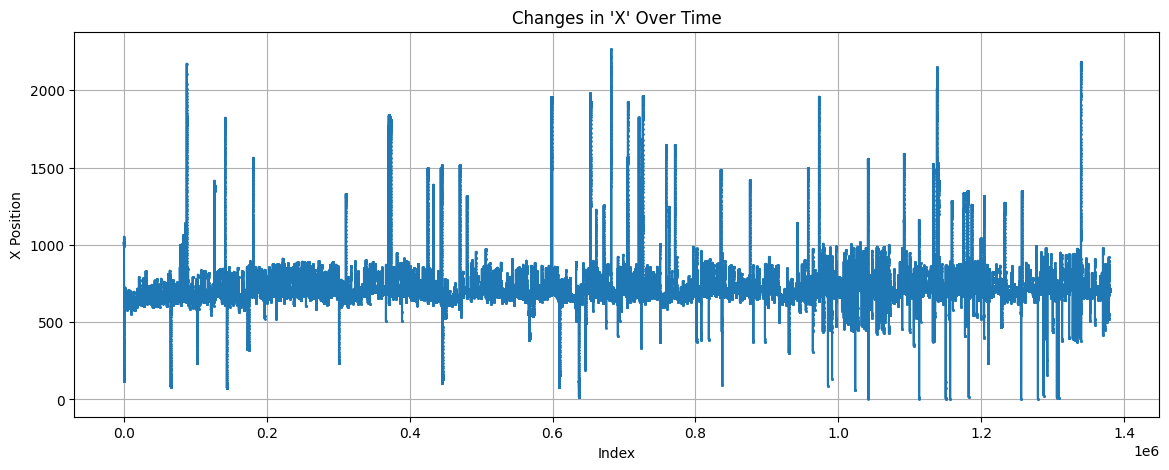

In [326]:

# Filter the data
test_data = panos.eye_data[panos.eye_data['Pupil'].notna()]

# Plot 'X' over time or index
plt.figure(figsize=(14, 5))  # Increase width
plt.plot(test_data.index, test_data['X'], marker='o', markersize=1, linestyle='-')

# Labels and title
plt.xlabel("Index")
plt.ylabel("X Position")
plt.title("Changes in 'X' Over Time")
plt.grid()

# Show the plot
plt.show()


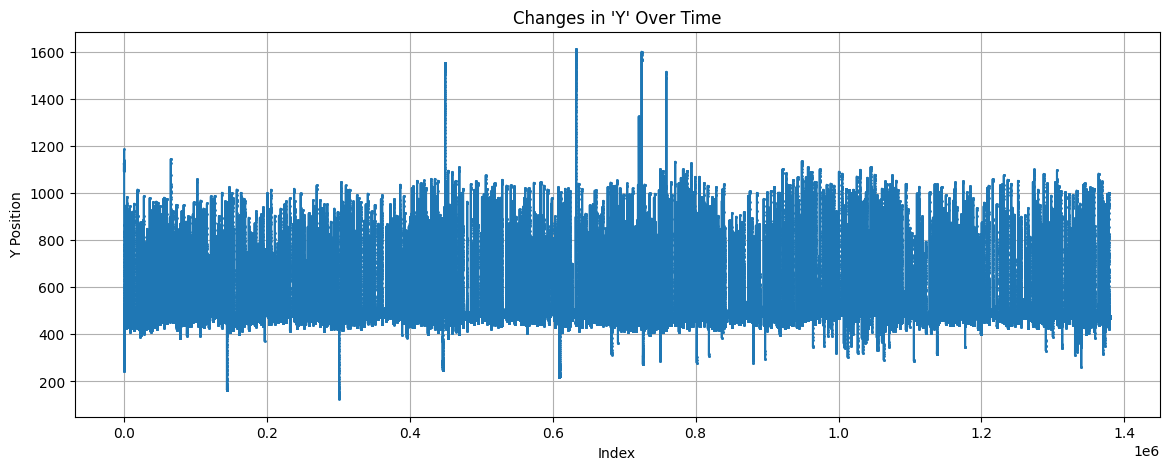

In [325]:


# Plot 'X' over time or index
plt.figure(figsize=(14, 5))  # Increase width
plt.plot(test_data.index, test_data['Y'], marker='o', markersize=1, linestyle='-')

# Labels and title
plt.xlabel("Index")
plt.ylabel("Y Position")
plt.title("Changes in 'Y' Over Time")
plt.grid()

# Show the plot
plt.show()

# Count Incorrect Trial

In [10]:
(panos.log_data["performance"] == "Incorrect").sum()  # If 'incorrect' is a string


14

In [13]:
incorrect_trials = panos.log_data.loc[panos.log_data["performance"] == "Incorrect", "trial_index"]
incorrect_trials

3        4
13      14
22      23
28      29
51      52
56      57
100    101
109    110
155    156
175    176
217    218
221    222
248    249
254    255
Name: trial_index, dtype: int64

In [17]:
bins = np.arange(1, 271, 30)  # Creates bins [1-30, 31-60, ..., 241-270]
bins = np.append(bins, 271)  # Ensures the last bin includes 270

# Define bin labels
bin_labels = [f"{i}-{i+29}" for i in bins[:-1]]

# Count incorrect trials in each bin
bin_counts = pd.cut(incorrect_trials, bins=bins, right=True, labels=bin_labels).value_counts().sort_index()

# Print results
print("Incorrect trial counts per range:")
print(bin_counts)

Incorrect trial counts per range:
trial_index
1-30       4
31-60      2
61-90      0
91-120     2
121-150    0
151-180    2
181-210    0
211-240    2
241-270    2
Name: count, dtype: int64


# Plot rt

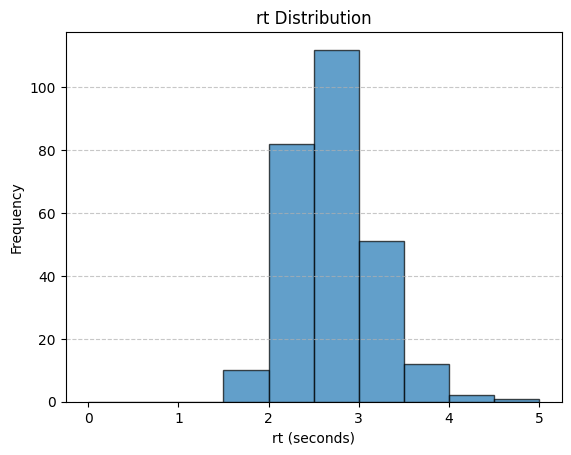

In [11]:
import matplotlib.pyplot as plt
import numpy as np


# Define bins (adjust based on your data range, now in seconds)
bins = np.arange(0, panos.log_data["rt"].max() + 0.5, 0.5)  # Binning in 0.5s intervals (adjust if needed)

# Create a histogram
plt.hist(panos.log_data["rt"], bins=bins, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("rt (seconds)")
plt.ylabel("Frequency")
plt.title("rt Distribution")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [10]:
panos.log_data["rt"].min()

1.8393852000590414

# Plot raw

/Users/wangying/Desktop/PupilDilationPsychopy/pdData/dataAnalyze.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_data.loc[:, 'adTimeEvent'] = pupil_data['TimeEvent'] - self.getlog_t_pivot(trial_num) + self.pivot_since_trial_start


[]


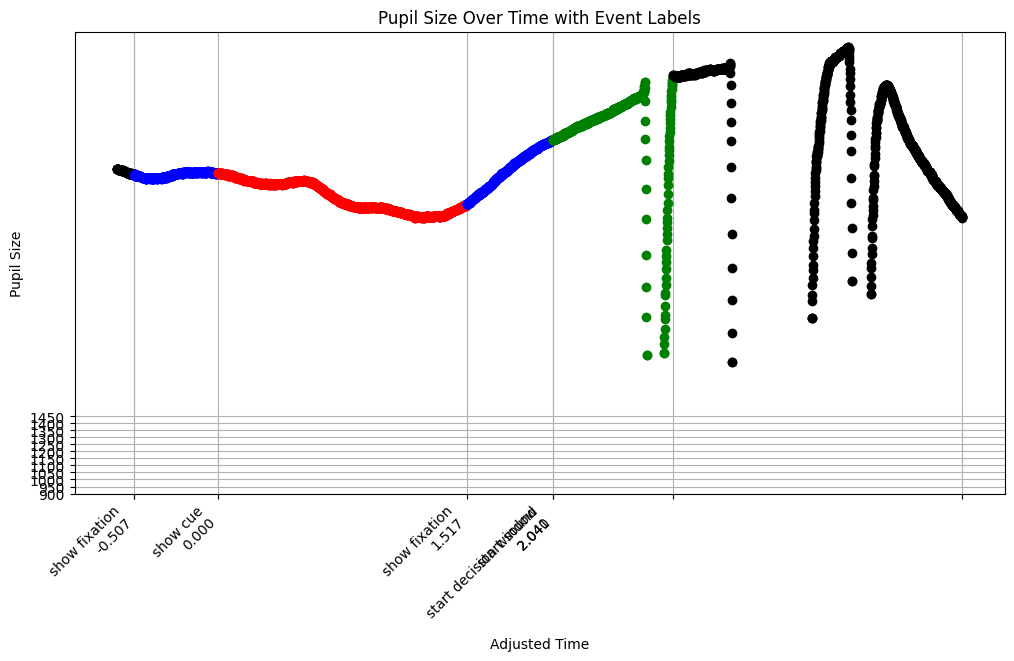

/Users/wangying/Desktop/PupilDilationPsychopy/pdData/dataAnalyze.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_data.loc[:, 'adTimeEvent'] = pupil_data['TimeEvent'] - self.getlog_t_pivot(trial_num) + self.pivot_since_trial_start


[]


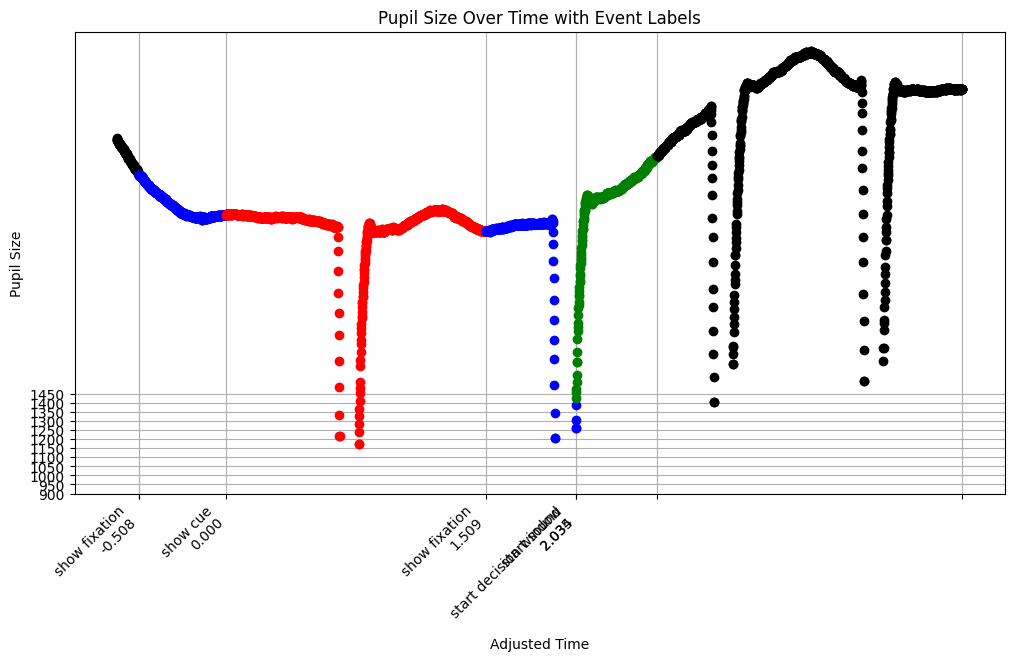

/Users/wangying/Desktop/PupilDilationPsychopy/pdData/dataAnalyze.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_data.loc[:, 'adTimeEvent'] = pupil_data['TimeEvent'] - self.getlog_t_pivot(trial_num) + self.pivot_since_trial_start


[]


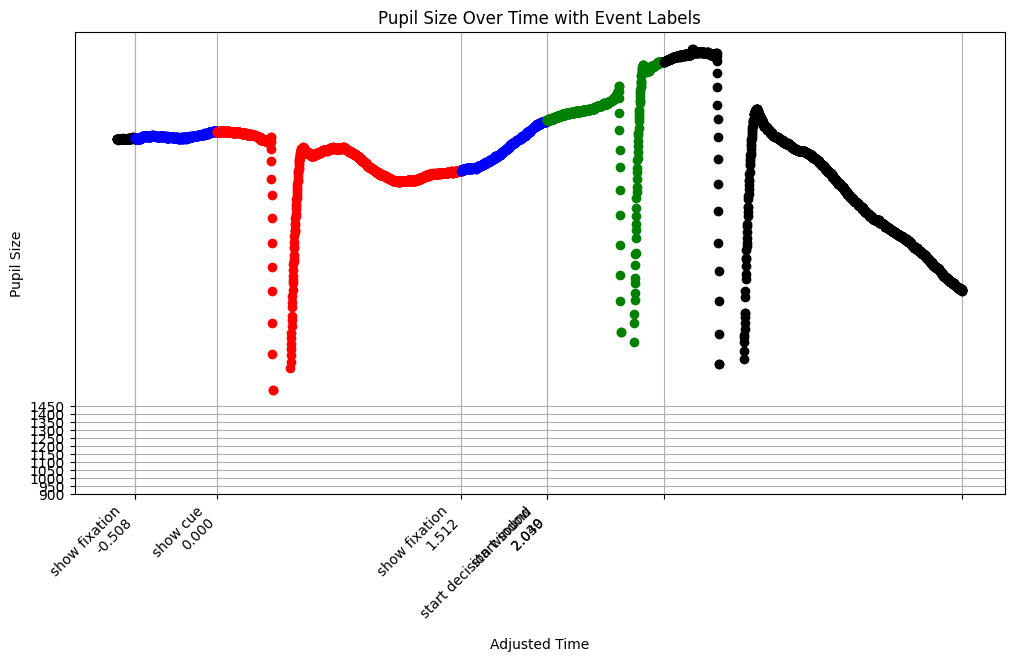

/Users/wangying/Desktop/PupilDilationPsychopy/pdData/dataAnalyze.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_data.loc[:, 'adTimeEvent'] = pupil_data['TimeEvent'] - self.getlog_t_pivot(trial_num) + self.pivot_since_trial_start


[]


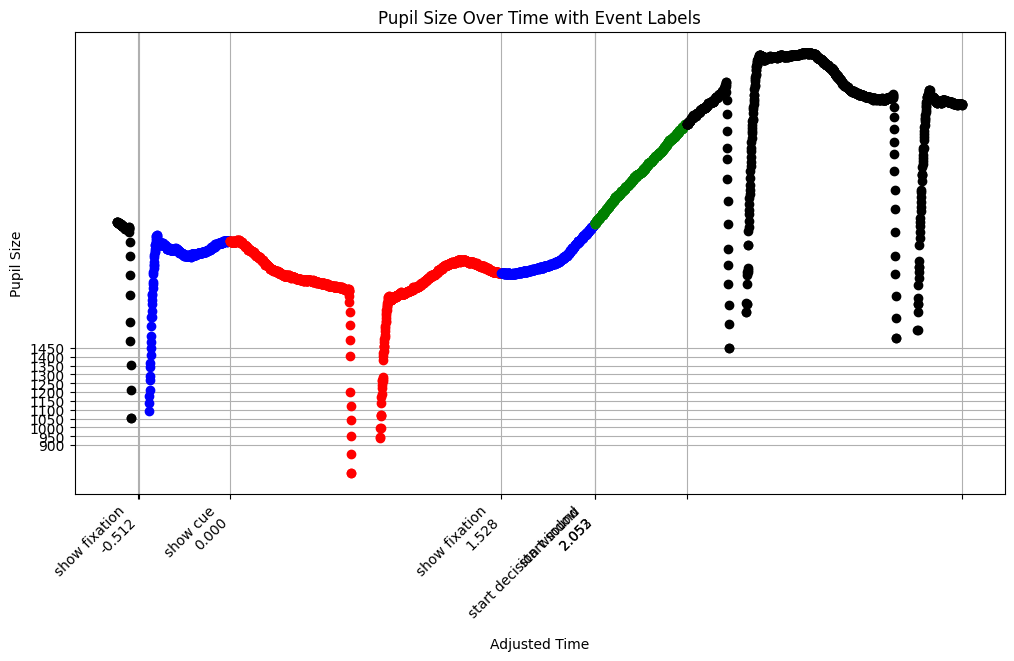

/Users/wangying/Desktop/PupilDilationPsychopy/pdData/dataAnalyze.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_data.loc[:, 'adTimeEvent'] = pupil_data['TimeEvent'] - self.getlog_t_pivot(trial_num) + self.pivot_since_trial_start


[]


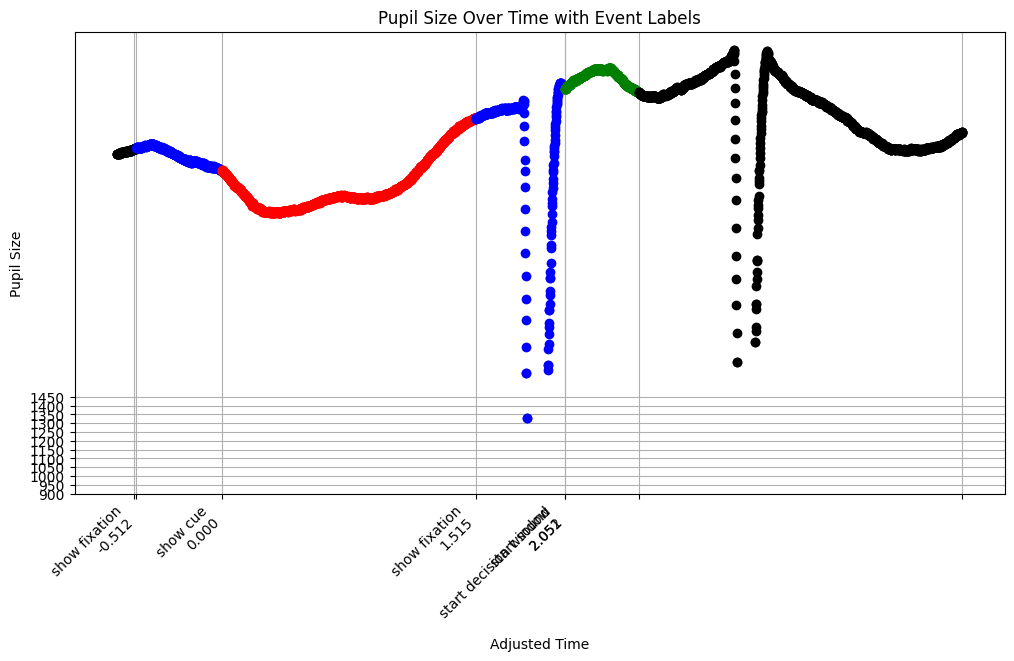

In [15]:
for i in [4,5,6,7,8]:
    panos.plot_pupil_size([i],normalized=False)

# Process Blink

## derivative

In [51]:

def calculate_pupil_differences(df):
    """
    Calculate differences and derivative for pupil data.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Pupil' and 'TimeEvent' columns.

    Returns:
    pd.DataFrame: Updated DataFrame with 'Pupil_diff', 'TimeEvent_diff', and 'Pupil_derivative' columns.
    """
    df = df.copy()  # Avoid modifying the original DataFrame
    
    # Calculate pupil size difference
    df['Pupil_diff'] = df['Pupil'].shift(-1) - df['Pupil']
    
    # Calculate time difference
    df['TimeEvent_diff'] = df['TimeEvent'].shift(-1) - df['TimeEvent']
    
    # Calculate pupil size derivative
    df['Pupil_derivative'] = df['Pupil_diff'] / df['TimeEvent_diff']
    
    # Drop NaN values (last row will have NaN due to shifting)
    df.dropna(subset=['Pupil_derivative'], inplace=True)
    
    return df



In [7]:

calculate_pupil_differences(panos.eye_data)



,Type,Event,Time,TimeEvent,Offset,trial_index,X,Y,Pupil,event,...,Eye,Start_X,Start_Y,End_X,End_Y,Amplitude,Peak_Velocity,Pupil_diff,TimeEvent_diff,Pupil_derivative
2,Gaze,NaN,NaN,65.400473,NaN,1,1013.7,1096.0,3077.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.001,3000.000000
3,Gaze,NaN,NaN,65.401473,NaN,1,1013.9,1097.0,3080.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.000000
4,Gaze,NaN,NaN,65.402473,NaN,1,1014.0,1097.0,3080.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.001,4000.000000
5,Gaze,NaN,NaN,65.403473,NaN,1,1015.3,1098.8,3084.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.000000
6,Gaze,NaN,NaN,65.404473,NaN,1,1015.7,1098.8,3084.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,0.001,-6000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380109,Gaze,NaN,NaN,1764.801615,NaN,270,711.6,473.1,1877.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.000000
1380110,Gaze,NaN,NaN,1764.802615,NaN,270,711.6,473.1,1877.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.001,-2000.000000
1380111,Gaze,NaN,NaN,1764.803615,NaN,270,711.6,473.1,1875.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.001,-2000.000001
1380112,Gaze,NaN,NaN,1764.804615,NaN,270,711.6,473.0,1873.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.001,-1000.000000


In [26]:
panos.eye_data['Pupil_derivative'].quantile(0.9)
#max 1130000.000026721
#min -1097999.999776308


2999.9999993888196

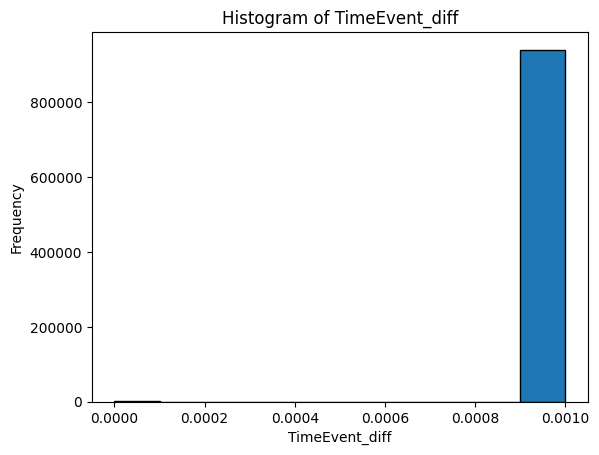

In [38]:
bins = np.arange(0, 0.0011, 0.0001) 
plt.hist(panos.eye_data['TimeEvent_diff'],bins=bins, edgecolor='black')
plt.xlabel('TimeEvent_diff')
plt.ylabel('Frequency')
plt.title('Histogram of TimeEvent_diff')
plt.show()


In [39]:
panos.eye_data['TimeEvent_diff'].unique()

array([0.0004451, 0.007    , 0.001    , ..., 0.0007569, 0.0009775,
       0.0006531])

zoomed in?:  False


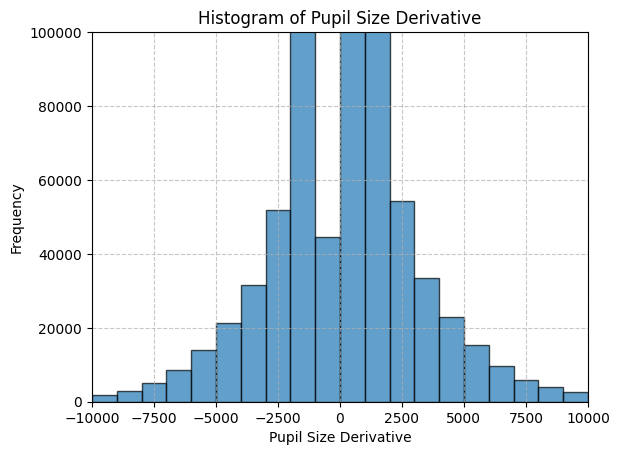

In [40]:
# zoomed_in = True
zoomed_in = False

print("zoomed in?: ", zoomed_in)

# Ensure the 'Pupil_derivative' column exists
if 'Pupil_derivative' in panos.eye_data.columns:
    if zoomed_in:
        bins = np.arange(-1000, 2001, 1000)  # Adjust bins step as needed

    else:
        bins = np.arange(-10000, 10001, 1000)  # Adjust bins step as needed
    
    # Create histogram of 'Pupil_derivative'
    plt.hist(panos.eye_data['Pupil_derivative'].dropna(), bins=bins, edgecolor='black', alpha=0.7)

    # Set the x-axis range
    if zoomed_in:
        plt.xlim(-1000, 2000)
    else:
        plt.xlim(-10000,10000)
    plt.ylim(0, 10**5)

    # Add labels and title
    plt.xlabel("Pupil Size Derivative")
    plt.ylabel("Frequency")
    plt.title("Histogram of Pupil Size Derivative")
    plt.grid(True, linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()
else:
    print("Pupil_derivative column not found in the data.")



In [25]:
panos.eye_data['Pupil_derivative'].describe()

count    1.367064e+06
mean    -4.301201e+01
std      1.275516e+04
min     -1.098000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+03
max      1.130000e+06
Name: Pupil_derivative, dtype: float64

-1098.0 1130.0


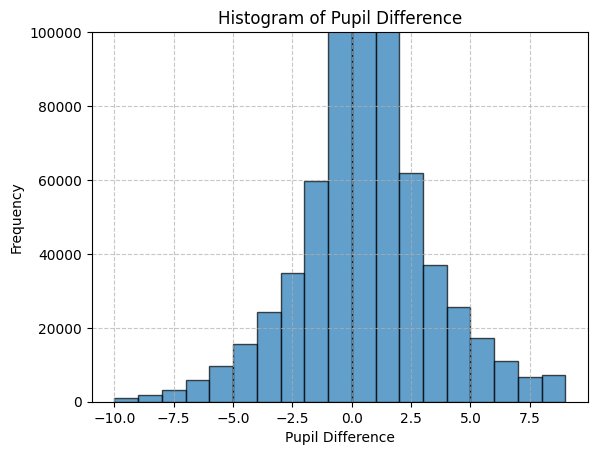

In [22]:
# SANITY CHECK: usually pupil dilates/contracts 1/2mm per second  
zoomed_in = True
# zoomed_in = False
print("zoomed in?: ", zoomed_in)

# Ensure 'Pupil_diff' column exists
if 'Pupil_diff' in panos.eye_data.columns:
    # Plot the histogram of pupil differences
    min_val = panos.eye_data['Pupil_diff'].min()
    max_val = panos.eye_data['Pupil_diff'].max()
    print(min_val,max_val)


    if zoomed_in:
        bins = np.arange(-10, 10, 1)  # Adjust bins step as needed
    else:
        bins = np.arange(-1000, 1001, 10)  # Adjust bins step as needed

    plt.hist(panos.eye_data['Pupil_diff'].dropna(), bins=bins, edgecolor='black', alpha=0.7)

    plt.ylim(0, 10**5)

    # Add labels and title
    plt.xlabel("Pupil Difference")
    plt.ylabel("Frequency")
    plt.title("Histogram of Pupil Difference")

    # Add grid for better visibility
    plt.grid(True, linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()
else:
    print("Pupil_diff column not found in the data.")


In [24]:
panos.eye_data['Pupil_diff'].describe()

count    1.370685e+06
mean    -4.286032e-02
std      1.711506e+01
min     -1.098000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.130000e+03
Name: Pupil_diff, dtype: float64

## Plotting 1 (filter out pupil size and derivative outliers)



In [52]:
def filter_eye_data_diff(eye_data, trial_index_list, diff_lower_bound, diff_upper_bound, derive_lower_bound,derive_upper_bound, window_size=110):
    """
    Plots pupil size over TimeEvent as a scatter plot for specified trial index list, 
    with a pupil difference filter and removes outliers based on a rolling 1000-point window.

    Parameters:
    - eye_data: DataFrame containing 'TimeEvent', 'Pupil', and 'trial_index' columns.
    - trial_index_list: List of trial indices to plot.
    - lower_bound: Lower bound for filtering 'Pupil_diff'.
    - upper_bound: Upper bound for filtering 'Pupil_diff'.
    """
    eye_data = eye_data[eye_data['trial_index'].isin(trial_index_list)].copy()
    eye_data = calculate_pupil_differences(eye_data)

    # Filter data by trial index and pupil difference range
    # filtered_data = eye_data[
    #     (eye_data['trial_index'].isin(trial_index_list)) &
    #     (eye_data['Pupil_diff'] >= diff_lower_bound) &
    #     (eye_data['Pupil_diff'] <= diff_upper_bound) &
    #     (eye_data['Pupil_derivative'] >= derive_lower_bound) &
    #     (eye_data['Pupil_derivative'] <= derive_upper_bound)
    # ].copy()  # Copy to avoid modifying original DataFrame

    filtered_data = eye_data[
        (eye_data['Pupil_diff'] >= diff_lower_bound) &
        (eye_data['Pupil_diff'] <= diff_upper_bound) 
    ]
    print("remain row number: ", len(filtered_data))
    return filtered_data


In [48]:


def filter_eye_data_diff(eye_data, trial_index_list, diff_lower_bound, diff_upper_bound, derive_lower_bound,derive_upper_bound, window_size=110):
    """
    Plots pupil size over TimeEvent as a scatter plot for specified trial index list, 
    with a pupil difference filter and removes outliers based on a rolling 1000-point window.

    Parameters:
    - eye_data: DataFrame containing 'TimeEvent', 'Pupil', and 'trial_index' columns.
    - trial_index_list: List of trial indices to plot.
    - lower_bound: Lower bound for filtering 'Pupil_diff'.
    - upper_bound: Upper bound for filtering 'Pupil_diff'.
    """
    # Filter data by trial index and pupil difference range
    # filtered_data = eye_data[
    #     (eye_data['trial_index'].isin(trial_index_list)) &
    #     (eye_data['Pupil_diff'] >= diff_lower_bound) &
    #     (eye_data['Pupil_diff'] <= diff_upper_bound) &
    #     (eye_data['Pupil_derivative'] >= derive_lower_bound) &
    #     (eye_data['Pupil_derivative'] <= derive_upper_bound)
    # ].copy()  # Copy to avoid modifying original DataFrame
    filtered_data = eye_data[
        (eye_data['trial_index'].isin(trial_index_list)) &
        (eye_data['Pupil_diff'] >= diff_lower_bound) &
        (eye_data['Pupil_diff'] <= diff_upper_bound) 
    ].copy()
    # # Compute rolling median and IQR for outlier detection
    # rolling_median = filtered_data['Pupil'].rolling(window=window_size, center=True).median()
    # rolling_iqr = filtered_data['Pupil'].rolling(window=window_size, center=True).quantile(0.55) - \
    #               filtered_data['Pupil'].rolling(window=window_size, center=True).quantile(0.40)
    
    # # Define outliers as points outside 1.5 * IQR from the rolling median
    # lower_outlier_bound = rolling_median - 1.5 * rolling_iqr
    # upper_outlier_bound = rolling_median + 1.5 * rolling_iqr
    
    # # Remove outliers
    # filtered_data = filtered_data[
    #     (filtered_data['Pupil'] >= lower_outlier_bound) & 
    #     (filtered_data['Pupil'] <= upper_outlier_bound)
    # ]
    print(len(filtered_data))
    # Scatter plot
    plt.figure(figsize=(10, 6))
    for trial_index in trial_index_list:
        trial_data = filtered_data[filtered_data['trial_index'] == trial_index]
        plt.scatter(trial_data['TimeEvent'], trial_data['Pupil'], label=f'Trial {trial_index}', alpha=0.6)
    
    # Adding labels and title
    plt.xlabel('TimeEvent (ms)')
    plt.ylabel('Pupil Size (mm)')
    plt.title('Pupil Size Over Time for Selected Trials (Filtered Scatter Plot)')
    plt.legend()
    plt.grid(True)
    plt.show()


2161


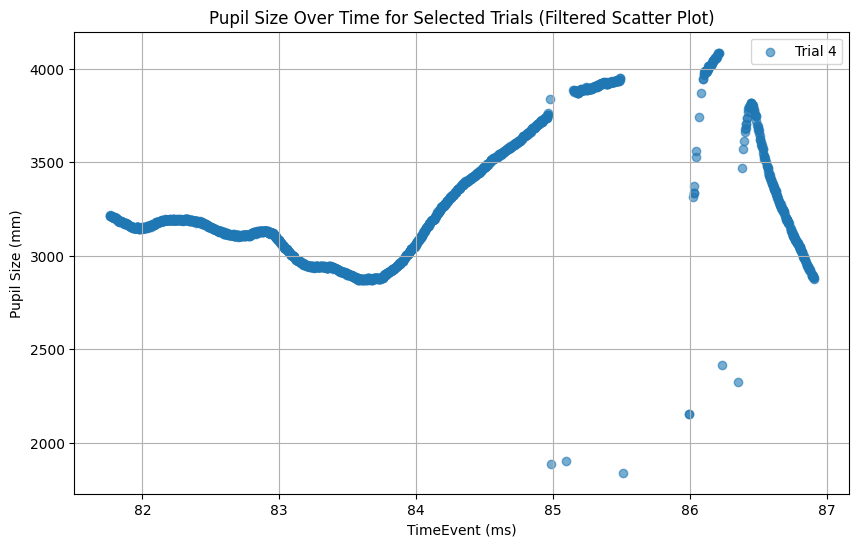

In [49]:
plot_pupil_size_over_time_filtered(panos.eye_data,[4],-0.5,0.5,-1000, 2000, 110)

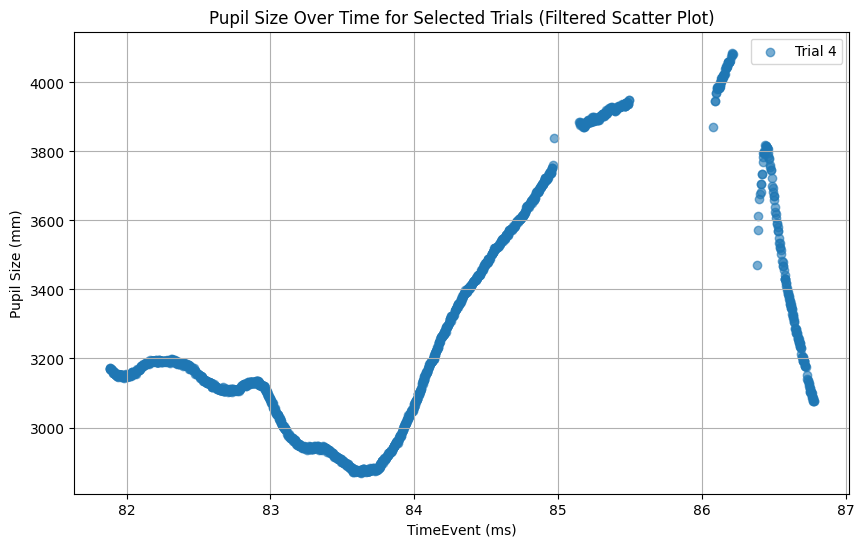

In [131]:
plot_pupil_size_over_time_filtered(panos.eye_data,[4],-0.002,0.002,110)

## plotting 2 (process blink locally)


In [79]:
def process_blink(eye_data,inner_bound=0.2, outer_bound=0.22):
    print("origional data length: ", len(eye_data))
    # Step 1: Filter data by trial index
    # eyedatacopy = eye_data[eye_data['trial_index'].isin(trial_index_list)].copy()

    # Step 2: Identify blinks and their timing
    blink_data = eye_data[eye_data['Type'] == 'Blink'][['Start', 'End']]

    before_pupil_sizes = []
    after_pupil_sizes = []

    # Step 3: Compute average pupil size before and after each blink
    for _, blink in blink_data.iterrows():
        start_time = blink['Start']
        end_time = blink['End']

        before_data = eye_data[(eye_data['TimeEvent'] >= start_time - outer_bound) &
                                  (eye_data['TimeEvent'] < start_time - inner_bound)]
        avg_before = before_data['Pupil'].mean()

        after_data = eye_data[(eye_data['TimeEvent'] > end_time + inner_bound) &
                                 (eye_data['TimeEvent'] <= end_time + outer_bound)]
        avg_after = after_data['Pupil'].mean()

        before_pupil_sizes.append(avg_before)
        after_pupil_sizes.append(avg_after)

    blink_data['Avg_Pupil_Before'] = before_pupil_sizes
    blink_data['Avg_Pupil_After'] = after_pupil_sizes
    print(blink_data)


    # Step 4: Remove invalid pupil size values during blinks
    pupil_data = eye_data[eye_data['Pupil'].notna()]

    selected_data = []

    for _, row in pupil_data.iterrows():
        valid = True
        for _, blink in blink_data.iterrows():
            if blink['Start'] - 0.05 <= row['TimeEvent'] <= blink['End'] + 0.05:
                print("checking validity")
                avg_before = blink['Avg_Pupil_Before']
                avg_after = blink['Avg_Pupil_After']
                if not (avg_before <= row['Pupil'] <= avg_after):
                    valid = False
                    break
        if valid:
            selected_data.append(row)

    selected_data = pd.DataFrame(selected_data)
    print("remain row number: ", len(selected_data))

    return selected_data

In [77]:
trial_4_data = panos.eye_data[panos.eye_data['trial_index'] == 4]


In [71]:
len(
    trial_4_data
)

4461

In [80]:
process_blink(trial_4_data)

origional data length:  4479
           Start        End  Avg_Pupil_Before  Avg_Pupil_After
18716  84.988605  85.091605           3633.90          3903.35
19139  85.510688  85.990688           3903.35          4070.05
19390  86.239688  86.350688           3367.80          3484.25
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity
checking validity

,Type,Event,Time,TimeEvent,Offset,trial_index,X,Y,Pupil,event,...,Eye,Start_X,Start_Y,End_X,End_Y,Amplitude,Peak_Velocity,Pupil_diff,TimeEvent_diff,Pupil_derivative
15476,Gaze,NaN,NaN,81.759357,NaN,4,620.4,472.1,3218.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.001000,2000.0
15477,Gaze,NaN,NaN,81.760357,NaN,4,620.6,471.9,3220.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001000,0.0
15478,Gaze,NaN,NaN,81.761357,NaN,4,620.8,471.9,3220.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.001000,-2000.0
15479,Gaze,NaN,NaN,81.762357,NaN,4,620.8,472.1,3218.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.001000,-2000.0
15480,Gaze,NaN,NaN,81.763357,NaN,4,620.6,472.2,3216.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.001000,-2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19947,Gaze,NaN,NaN,86.906688,NaN,4,635.8,491.8,2874.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001000,0.0
19948,Gaze,NaN,NaN,86.907688,NaN,4,636.1,491.8,2874.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000903,NaN
19950,Gaze,NaN,NaN,86.908591,NaN,4,636.8,491.8,2874.0,done,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458.0,NaN,NaN
19951,Fixation,NaN,NaN,NaN,NaN,4,627.9,486.0,3332.0,done,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-464.0,NaN,NaN


In [ ]:
def process_blink(eye_data,inner_bound=0.2, outer_bound=0.22):
    print("origional data length: ", len(eye_data))
    # Step 1: Filter data by trial index
    # eyedatacopy = eye_data[eye_data['trial_index'].isin(trial_index_list)].copy()

    # Step 2: Identify blinks and their timing
    blink_data = eye_data[eye_data['Type'] == 'Blink'][['Start', 'End']]

    before_pupil_sizes = []
    after_pupil_sizes = []

    # Step 3: Compute average pupil size before and after each blink
    for _, blink in blink_data.iterrows():
        start_time = blink['Start']
        end_time = blink['End']

        before_data = eye_data[(eye_data['TimeEvent'] >= start_time - outer_bound) &
                                  (eye_data['TimeEvent'] < start_time - inner_bound)]
        avg_before = before_data['Pupil'].mean()

        after_data = eye_data[(eye_data['TimeEvent'] > end_time + inner_bound) &
                                 (eye_data['TimeEvent'] <= end_time + outer_bound)]
        avg_after = after_data['Pupil'].mean()

        before_pupil_sizes.append(avg_before)
        after_pupil_sizes.append(avg_after)

    blink_data['Avg_Pupil_Before'] = before_pupil_sizes
    blink_data['Avg_Pupil_After'] = after_pupil_sizes
    print(blink_data)


    # Step 4: Remove invalid pupil size values during blinks
    pupil_data = eye_data[eye_data['Pupil'].notna()]

    selected_data = []

    for _, row in pupil_data.iterrows():
        valid = True
        for _, blink in blink_data.iterrows():
            if blink['Start'] - 0.05 <= row['TimeEvent'] <= blink['End'] + 0.05:
                print("checking validity")
                avg_before = blink['Avg_Pupil_Before']
                avg_after = blink['Avg_Pupil_After']
                if not (avg_before <= row['Pupil'] <= avg_after):
                    valid = False
                    break
        if valid:
            selected_data.append(row)

    selected_data = pd.DataFrame(selected_data)
    print("remain row number: ", len(selected_data))

    return selected_data

# Process Blink Functions 

In [ ]:
def calculate_pupil_differences(df):
    """
    Calculate differences and derivative for pupil data.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Pupil' and 'TimeEvent' columns.

    Returns:
    pd.DataFrame: Updated DataFrame with 'Pupil_diff', 'TimeEvent_diff', and 'Pupil_derivative' columns.
    """
    df = df.copy()  # Avoid modifying the original DataFrame
    
    # Calculate pupil size difference
    df['Pupil_diff'] = df['Pupil'].shift(-1) - df['Pupil']
    
    # Calculate time difference
    df['TimeEvent_diff'] = df['TimeEvent'].shift(-1) - df['TimeEvent']
    
    # Calculate pupil size derivative
    df['Pupil_derivative'] = df['Pupil_diff'] / df['TimeEvent_diff']
    
    # Drop NaN values (last row will have NaN due to shifting)
    df.dropna(subset=['Pupil_derivative'], inplace=True)
    
    return df

In [208]:
def record_blink(eye_data):
    blink_data = eye_data[eye_data['Type'] == 'Blink'][['Start', 'End']].copy()
    return blink_data

def find_pupil_bounds_around_blink(eye_data, blink_data, inner_bound=0.2, outer_bound=0.22):
    before_pupil_sizes = []
    after_pupil_sizes = []

    for _, blink in blink_data.iterrows():
        start_time = blink['Start']
        end_time = blink['End']

        before_data = eye_data[(eye_data['TimeEvent'] >= start_time - outer_bound) &
                                  (eye_data['TimeEvent'] < start_time - inner_bound)]
        avg_before = before_data['Pupil'].mean()

        after_data = eye_data[(eye_data['TimeEvent'] > end_time + inner_bound) &
                                 (eye_data['TimeEvent'] <= end_time + outer_bound)]
        avg_after = after_data['Pupil'].mean()

        before_pupil_sizes.append(avg_before)
        after_pupil_sizes.append(avg_after)
    return before_pupil_sizes, after_pupil_sizes

def select_valid_pupil_size(eye_data, blink_data):

    pupil_data = eye_data[eye_data['Pupil'].notna()]
    print("before blink process:", len(pupil_data))

    selected_data = []

    for _, row in pupil_data.iterrows():
        valid = True
        for _, blink in blink_data.iterrows():
            if blink['Start'] - 0.2 <= row['TimeEvent'] <= blink['End'] + 0.2:
                #print("checking validity")
                avg_before = blink['Avg_Pupil_Before']
                avg_after = blink['Avg_Pupil_After']
                if not (avg_before <= row['Pupil'] <= avg_after):
                    valid = False
                    break
        if valid:
            selected_data.append(row)

    selected_data = pd.DataFrame(selected_data)
    return selected_data



In [ ]:
def plot_pupil_size(pupil_data):
    if 'TimeEvent' in pupil_data.columns and 'Pupil' in pupil_data.columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(pupil_data['TimeEvent'], pupil_data['Pupil'], color='blue', alpha=0.6, label='Pupil Size')
        plt.title('Pupil Size Over TimeEvent')
        plt.xlabel('TimeEvent')
        plt.ylabel('Pupil Size')
        plt.legend()
        plt.grid(True)
        plt.show()

In [204]:
def filter_eye_data_diff_blink(eye_data, trial_index_list, rep = 1.5, diff_lower_bound=-2, diff_upper_bound=2, alpha_inner=0.5, alpha_outer = 0.5):

    eye_data = eye_data[eye_data['trial_index'].isin(trial_index_list)].copy()

    blink_data = record_blink(eye_data)
    #print(blink_data)

    inner_bound=0.2
    outer_bound=0.22

    for rep in range(rep):
 
        #find reasonable pupil size bound
        Avg_Pupil_Before, Avg_Pupil_After = find_pupil_bounds_around_blink(eye_data, blink_data, inner_bound=inner_bound, outer_bound=outer_bound)
        
        blink_data['Avg_Pupil_Before'] = Avg_Pupil_Before
        blink_data['Avg_Pupil_After'] = Avg_Pupil_After

        # exclude unreasonable pupil size
        eye_data = select_valid_pupil_size(eye_data, blink_data)
        print("row numbers after blink process: ", len(eye_data))
        
        #exclude unreasonable differences
        eye_data = calculate_pupil_differences(eye_data)

        eye_data = eye_data[
            (eye_data['Pupil_diff'] >= diff_lower_bound) &
            (eye_data['Pupil_diff'] <= diff_upper_bound) 
        ]

        print("row number after diff filtering: ", len(eye_data))
        # plot_pupil_size(eye_data)
        
        print("inner bound:", inner_bound,"outer bound", outer_bound)

        if rep == 0: 
            inner_bound=alpha_inner*inner_bound
            outer_bound=alpha_outer*outer_bound

    
    plot_pupil_size(eye_data)

    return eye_data


In [133]:
86.403688-86.350688

0.05299999999999727

before blink process: 22956
row numbers after blink process:  20739
row number after diff filtering:  17355
0.2 0.22
before blink process: 17355
row numbers after blink process:  17250
row number after diff filtering:  14356
0.1 0.11
before blink process: 14356
row numbers after blink process:  13942
row number after diff filtering:  12124
0.05 0.055


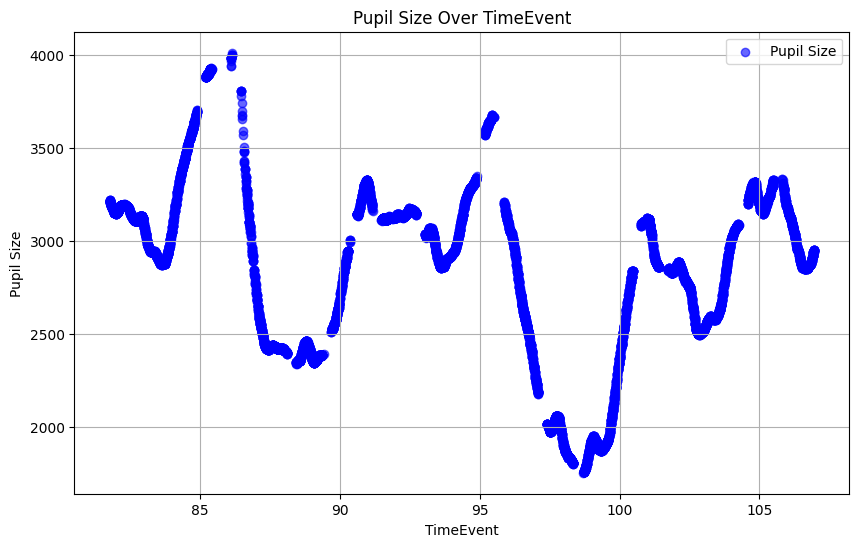

In [144]:
processed = filter_eye_data_diff_blink(panos.eye_data,[4,5,6,7,8],rep=3)

before blink process: 4999
row numbers after blink process:  4614
row number after diff filtering:  3738
0.2 0.22
before blink process: 3738
row numbers after blink process:  3672
row number after diff filtering:  2988
0.1 0.11
before blink process: 2988
row numbers after blink process:  2846
row number after diff filtering:  2434
0.05 0.055


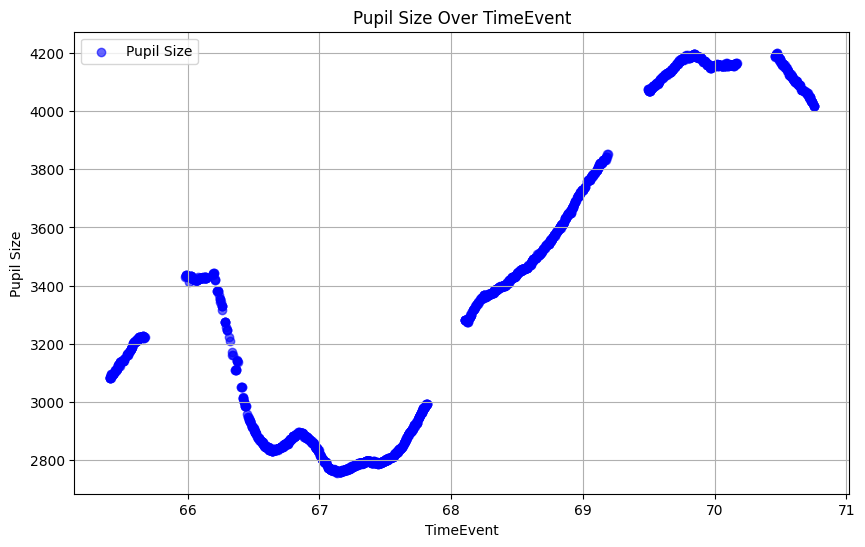

In [142]:
processed = filter_eye_data_diff_blink(panos.eye_data,[1],rep=3)

In [267]:
# old version
# def plot_pupil_data(trial_list, eye_data, clean_data=True):
#     """
#     Plots pupil size over time for specified trials, with optional data processing.

#     Parameters:
#         trial_list (list): List of trial indices to plot.
#         eye_data (pd.DataFrame): Raw eye-tracking DataFrame containing 'TimeEvent', 'Pupil', and 'trial_index'.
#         clean_data (bool): If True, processes the data before plotting.
#     """
#     if clean_data:
#         processed_data = process_pupil_data(eye_data,trial_list)  # Process the data
#     else:
#         processed_data = eye_data  # Use raw data

#     # Ensure required columns are present
#     if {'TimeEvent', 'Pupil', 'trial_index'}.issubset(processed_data.columns):
#         plt.figure(figsize=(10, 6))

#         for trial_index in trial_list:
#             trial_data = processed_data[processed_data['trial_index'] == trial_index]
#             plt.scatter(trial_data['TimeEvent'], trial_data['Pupil'], label=f'Trial {trial_index}', alpha=0.6)

#         # Adding labels and title
#         plt.xlabel('TimeEvent')
#         plt.ylabel('Pupil Size')
#         title_prefix = "Cleaned" if clean_data else "Raw"
#         plt.title(f'{title_prefix} Pupil Size Over Time for trial {trial_list}')
#         plt.legend()
#         plt.grid(True)
#         plt.show()
#     else:
#         print("Error: DataFrame must contain 'TimeEvent', 'Pupil', and 'trial_index' columns.")


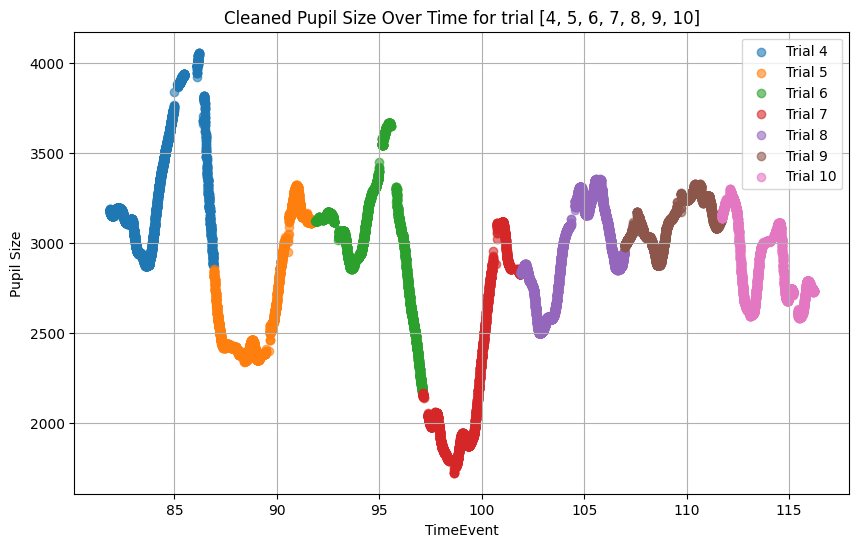

In [270]:
# old version 
plot_pupil_data([4,5,6,7,8,9,10],panos_eye)

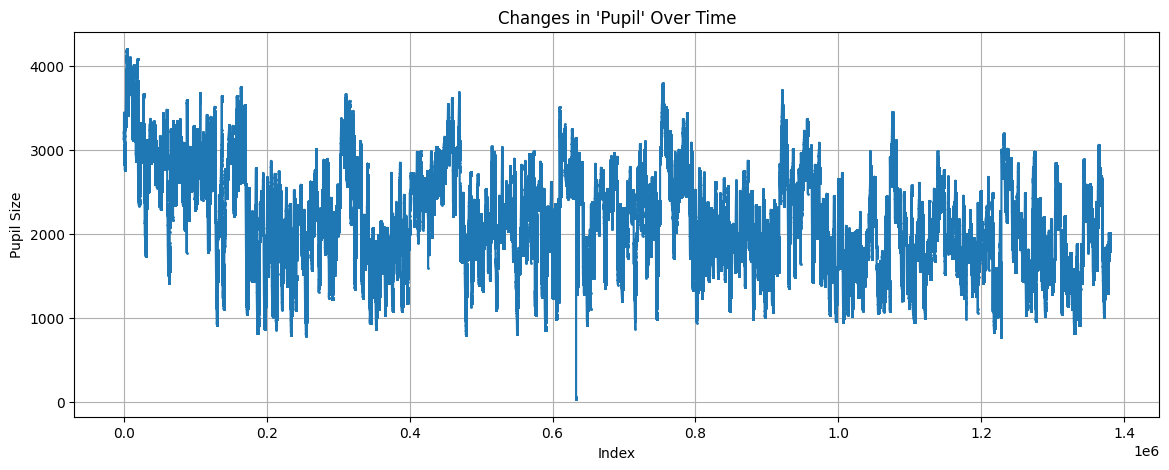

In [329]:
# old version

whole_exp_trial = list(range(1, 271))
# Filter the data
test_data = panos.eye_data[panos.eye_data['Pupil'].notna()]

processed_test_data = process_pupil_data(test_data, whole_exp_trial)

# Plot 'X' over time or index
plt.figure(figsize=(14, 5))  # Increase width
plt.plot(processed_test_data.index, processed_test_data['Pupil'], marker='o', markersize=1, linestyle='-')

# Labels and title
plt.xlabel("Index")
plt.ylabel("Pupil Size")
plt.title("Changes in 'Pupil' Over Time")
plt.grid()

# Show the plot
plt.show()


In [145]:
def bernoulli_entropy(p):
    """
    Computes the entropy of a Bernoulli random variable with probability p.
    """
    if p == 0 or p == 1:
        return 0  # log(0) is undefined, but entropy is 0 in these cases
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def block_entropy(p_x, p_y):
    """
    Computes the joint entropy of two independent Bernoulli random variables.
    """
    return bernoulli_entropy(p_x) + bernoulli_entropy(p_y)


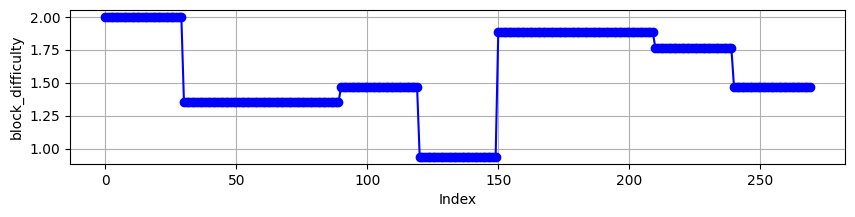

In [146]:

# Apply function to each row
panos.log_data['block_entropy'] = panos.log_data.apply(
    lambda row: block_entropy(row['left_cue_condition'], row['stimA_condition']), axis=1
)

plt.figure(figsize=(10, 2))
plt.plot(panos.log_data.index, panos.log_data['block_entropy'], marker='o', linestyle='-', color='b')

plt.xlabel("Index")
plt.ylabel("block_entropy")
plt.grid(True)

plt.show()

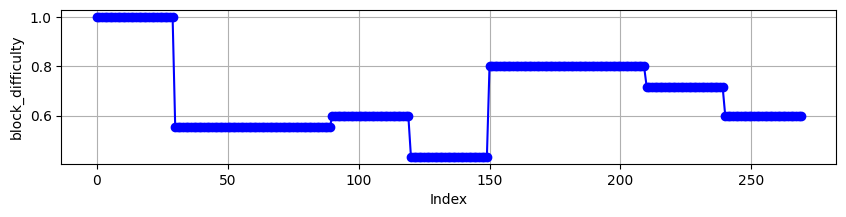

In [341]:
# old version

def block_difficulty(x, y):
    """Compute block difficulty as 1 - distance from (0.5, 0.5)."""
    return 1 - np.sqrt((x - 0.5)**2 + (y - 0.5)**2)

# Apply function to each row
panos.log_data['block_difficulty'] = panos.log_data.apply(
    lambda row: block_difficulty(row['left_cue_condition'], row['stimA_condition']), axis=1
)

plt.figure(figsize=(10, 2))
plt.plot(panos.log_data.index, panos.log_data['block_difficulty'], marker='o', linestyle='-', color='b')

plt.xlabel("Index")
plt.ylabel("block_difficulty")
plt.grid(True)

plt.show()

# Charaterize Surpirse Level 

In [150]:

def KLdivergence(prior, posterior, epsilon=1e-2):
    prior = np.array(prior)
    posterior = np.array(posterior)
    
    prior = np.where(prior <= 0, epsilon, prior)
    posterior = np.where(posterior <= 0, epsilon, posterior)
    
    divergence = 0
    for i in range(len(prior)):
        divergence += posterior[i] * np.log(posterior[i] / prior[i])
    
    return divergence

## sensory based

In [153]:
def sensory_posterior(stimulus):
    mapping = {
        'A|A': [1, 0, 0, 0],
        'A|B': [0, 1, 0, 0],
        'B|A': [0, 0, 1, 0],
        'B|B': [0, 0, 0, 1]
    }
    if stimulus not in mapping:
        print('stimulus not in mapping')
    return mapping.get(stimulus, [0, 0, 0, 0])  # Default case if unknown stimulus

def sensory_prior(stimA_prob):
    return [stimA_prob**2, stimA_prob*(1 - stimA_prob), 
            stimA_prob*(1 - stimA_prob), (1 - stimA_prob)**2]

In [162]:


panos.log_data['sensory_prior'] = panos.log_data['stimA_condition'].apply(sensory_prior)
panos.log_data['sensory_posterior'] = panos.log_data['stimulus'].apply(sensory_posterior)

# Compute KL divergence row-wise
panos.log_data['sensory_surprise'] = panos.log_data.apply(
    lambda row: KLdivergence(row['sensory_prior'], row['sensory_posterior']), axis=1
)



In [300]:
panos.log_data

,cue_direction,stimulus,correct_response,left_cue_condition,stimA_condition,response,performance,rt,events,trial_index,wid,sensory_posterior,sensory_prior,sensory_surprise,action_prior,action_posterior,action_surprise,action_cue_prior,action_cue_posterior,action_cue_surprise
0,left,A|B,f,0.5,0.5,f,Correct,2.494738,"[{'time': 65.39302819990553, 'event': 'initial...",1,25-02-07-1440_setting0,"[0, 1, 0, 0]","[0.25, 0.25, 0.25, 0.25]",1.289728,"[0.5, 0.5]","[1, 0]",0.654027,"[0.5, 0.5, 0.5, 0.5]","[1, 0, 0, 1]",1.308054
1,left,B|B,j,0.5,0.5,j,Correct,2.859767,"[{'time': 70.77509270003065, 'event': 'initial...",2,25-02-07-1440_setting0,"[0, 0, 0, 1]","[0.25, 0.25, 0.25, 0.25]",1.289728,"[0.5, 0.5]","[0, 1]",0.654027,"[0.5, 0.5, 0.5, 0.5]","[0, 1, 0, 1]",1.308054
2,right,B|A,f,0.5,0.5,f,Correct,2.730730,"[{'time': 76.33833679999225, 'event': 'initial...",3,25-02-07-1440_setting0,"[0, 0, 1, 0]","[0.25, 0.25, 0.25, 0.25]",1.289728,"[0.5, 0.5]","[1, 0]",0.654027,"[0.5, 0.5, 0.5, 0.5]","[1, 0, 0, 1]",1.308054
3,left,A|A,f,0.5,0.5,j,Incorrect,2.493978,"[{'time': 81.75319979991764, 'event': 'initial...",4,25-02-07-1440_setting0,"[1, 0, 0, 0]","[0.25, 0.25, 0.25, 0.25]",1.289728,"[0.5, 0.5]","[1, 0]",0.654027,"[0.5, 0.5, 0.5, 0.5]","[1, 0, 0, 1]",1.308054
4,left,A|A,f,0.5,0.5,f,Correct,2.244778,"[{'time': 86.91842569992878, 'event': 'initial...",5,25-02-07-1440_setting0,"[1, 0, 0, 0]","[0.25, 0.25, 0.25, 0.25]",1.289728,"[0.5, 0.5]","[1, 0]",0.654027,"[0.5, 0.5, 0.5, 0.5]","[1, 0, 0, 1]",1.308054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,left,A|A,f,0.5,0.9,f,Correct,2.490346,"[{'time': 1737.8764941999689, 'event': 'initia...",266,25-02-07-1440_setting0,"[1, 0, 0, 0]","[0.81, 0.08999999999999998, 0.0899999999999999...",0.166777,"[0.5, 0.5]","[1, 0]",0.654027,"[0.9, 0.09999999999999998, 0.5, 0.5]","[1, 0, 0, 1]",0.736362
266,left,B|A,j,0.5,0.9,j,Correct,3.463555,"[{'time': 1743.06087019993, 'event': 'initiali...",267,25-02-07-1440_setting0,"[0, 0, 1, 0]","[0.81, 0.08999999999999998, 0.0899999999999999...",2.342029,"[0.5, 0.5]","[0, 1]",0.654027,"[0.9, 0.09999999999999998, 0.5, 0.5]","[0, 1, 0, 1]",2.911614
267,left,A|A,f,0.5,0.9,f,Correct,2.105842,"[{'time': 1749.239352799952, 'event': 'initial...",268,25-02-07-1440_setting0,"[1, 0, 0, 0]","[0.81, 0.08999999999999998, 0.0899999999999999...",0.166777,"[0.5, 0.5]","[1, 0]",0.654027,"[0.9, 0.09999999999999998, 0.5, 0.5]","[1, 0, 0, 1]",0.736362
268,left,A|A,f,0.5,0.9,f,Correct,2.502170,"[{'time': 1754.0374491999391, 'event': 'initia...",269,25-02-07-1440_setting0,"[1, 0, 0, 0]","[0.81, 0.08999999999999998, 0.0899999999999999...",0.166777,"[0.5, 0.5]","[1, 0]",0.654027,"[0.9, 0.09999999999999998, 0.5, 0.5]","[1, 0, 0, 1]",0.736362


## action based (attended_stimulus) 

In [164]:
def action_prior(A_probability):
    return [A_probability, 1 - A_probability]


In [165]:
# the result should be the same as correct response

def action_posterior(stimulus, cue_direction):
    mapping = {
        'A|A': [1, 0], 
        'A|B': [1, 0] if cue_direction == 'left' else [0, 1],  
        'B|A': [0, 1] if cue_direction == 'left' else [1, 0],  
        'B|B': [0, 1] 
    }
    
    if stimulus not in mapping:
        print(f"⚠️ Warning: Unknown stimulus '{stimulus}' encountered!")
    
    return mapping.get(stimulus, [0, 0])  



In [166]:

panos.log_data['action_prior'] = panos.log_data['left_cue_condition'].apply(action_prior)
panos.log_data['action_posterior'] = panos.log_data.apply(
    lambda row: action_posterior(row['stimulus'], row['cue_direction']), axis=1
)

# Compute KL divergence row-wise
panos.log_data['action_surprise'] = panos.log_data.apply(
    lambda row: KLdivergence(row['action_prior'], row['action_posterior']), axis=1
)

panos.log_data

,cue_direction,stimulus,correct_response,left_cue_condition,stimA_condition,response,performance,rt,events,trial_index,...,action_cue_surprise,sensory_cue_posterior,sensory_cue_prior,sensory_cue_surprise,sensory_prior,sensory_posterior,sensory_surprise,action_prior,action_posterior,action_surprise
0,left,A|B,f,0.5,0.5,f,Correct,2.494738,"[{'time': 65.39302819990553, 'event': 'initial...",1,...,1.289728,"[0, 0, 0, 0, 0, 1, 0, 0]","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...",1.902641,"[0.25, 0.25, 0.25, 0.25]","[0, 1, 0, 0]",1.289728,"[0.5, 0.5]","[1, 0]",0.654027
1,left,B|B,j,0.5,0.5,j,Correct,2.859767,"[{'time': 70.77509270003065, 'event': 'initial...",2,...,1.289728,"[0, 0, 0, 0, 0, 0, 0, 1]","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...",1.902641,"[0.25, 0.25, 0.25, 0.25]","[0, 0, 0, 1]",1.289728,"[0.5, 0.5]","[0, 1]",0.654027
2,right,B|A,f,0.5,0.5,f,Correct,2.730730,"[{'time': 76.33833679999225, 'event': 'initial...",3,...,1.289728,"[0, 0, 0, 0, 0, 0, 1, 0]","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...",1.902641,"[0.25, 0.25, 0.25, 0.25]","[0, 0, 1, 0]",1.289728,"[0.5, 0.5]","[1, 0]",0.654027
3,left,A|A,f,0.5,0.5,j,Incorrect,2.493978,"[{'time': 81.75319979991764, 'event': 'initial...",4,...,1.289728,"[0, 0, 0, 0, 1, 0, 0, 0]","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...",1.902641,"[0.25, 0.25, 0.25, 0.25]","[1, 0, 0, 0]",1.289728,"[0.5, 0.5]","[1, 0]",0.654027
4,left,A|A,f,0.5,0.5,f,Correct,2.244778,"[{'time': 86.91842569992878, 'event': 'initial...",5,...,1.289728,"[0, 0, 0, 0, 1, 0, 0, 0]","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...",1.902641,"[0.25, 0.25, 0.25, 0.25]","[1, 0, 0, 0]",1.289728,"[0.5, 0.5]","[1, 0]",0.654027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,left,A|A,f,0.5,0.9,f,Correct,2.490346,"[{'time': 1737.8764941999689, 'event': 'initia...",266,...,0.728252,"[0, 0, 0, 0, 1, 0, 0, 0]","[0.405, 0.04499999999999999, 0.044999999999999...",0.820555,"[0.81, 0.08999999999999998, 0.0899999999999999...","[1, 0, 0, 0]",0.166777,"[0.5, 0.5]","[1, 0]",0.654027
266,left,B|A,j,0.5,0.9,j,Correct,3.463555,"[{'time': 1743.06087019993, 'event': 'initiali...",267,...,2.903505,"[0, 0, 0, 0, 0, 0, 1, 0]","[0.405, 0.04499999999999999, 0.044999999999999...",2.995807,"[0.81, 0.08999999999999998, 0.0899999999999999...","[0, 0, 1, 0]",2.342029,"[0.5, 0.5]","[0, 1]",0.654027
267,left,A|A,f,0.5,0.9,f,Correct,2.105842,"[{'time': 1749.239352799952, 'event': 'initial...",268,...,0.728252,"[0, 0, 0, 0, 1, 0, 0, 0]","[0.405, 0.04499999999999999, 0.044999999999999...",0.820555,"[0.81, 0.08999999999999998, 0.0899999999999999...","[1, 0, 0, 0]",0.166777,"[0.5, 0.5]","[1, 0]",0.654027
268,left,A|A,f,0.5,0.9,f,Correct,2.502170,"[{'time': 1754.0374491999391, 'event': 'initia...",269,...,0.728252,"[0, 0, 0, 0, 1, 0, 0, 0]","[0.405, 0.04499999999999999, 0.044999999999999...",0.820555,"[0.81, 0.08999999999999998, 0.0899999999999999...","[1, 0, 0, 0]",0.166777,"[0.5, 0.5]","[1, 0]",0.654027


## action+cue

In [151]:
def action_cue_prior(A_prob, leftCue_prob):
    return [A_prob*leftCue_prob, A_prob*(1-leftCue_prob), (1 - A_prob)*leftCue_prob, (1 - A_prob)*(1-leftCue_prob)]


'''or correct_response? '''
def action_cue_posterior(response, cue_direction):
    if response == 'f':
        A_prob = 1
    else:
        A_prob = 0
    
    if cue_direction == 'left': 
        leftCue_prob = 1
    else:
        leftCue_prob = 0 

    return action_cue_prior(A_prob,leftCue_prob)





In [152]:
panos.log_data['action_cue_prior'] = panos.log_data.apply(
    lambda row: action_cue_prior(row['stimA_condition'], row['left_cue_condition']), axis=1
)

'''其实是不是应该用['response']'''
panos.log_data['action_cue_posterior'] = panos.log_data.apply(
    lambda row: action_cue_posterior(row['response'], row['left_cue_condition']), axis=1
)


# Calculate KL divergence for each row
panos.log_data['action_cue_surprise'] = panos.log_data.apply(
    lambda row: KLdivergence(row['action_cue_prior'], row['action_cue_posterior']), axis=1
)

## sensory+cue  

In [154]:

def sensory_cue_prior(A_prob, leftCue_prob):
    store_sensory_prior = sensory_prior(A_prob)
    prior = [leftCue_prob * val for val in store_sensory_prior] + \
            [(1 - leftCue_prob) * val for val in store_sensory_prior]
    return prior

def sensory_cue_posterior(stimulus, cue_direction):
    store_sensory = sensory_posterior(stimulus)
    
    if cue_direction == 'left': 
        leftCue_prob = 1
    else:
        leftCue_prob = 0 
    
    posterior = [leftCue_prob * val for val in store_sensory] + \
            [(1 - leftCue_prob) * val for val in store_sensory]

    return posterior  



In [160]:
panos.log_data['sensory_cue_posterior'] = panos.log_data.apply(
    lambda row: sensory_cue_posterior(row['stimulus'], row['left_cue_condition']), axis=1
)
panos.log_data['sensory_cue_prior'] = panos.log_data.apply(
    lambda row: sensory_cue_prior(row['stimA_condition'], row['left_cue_condition']), axis=1
)

panos.log_data['sensory_cue_surprise'] = panos.log_data.apply(
    lambda row: KLdivergence(row['sensory_cue_prior'], row['sensory_cue_posterior']), axis=1
)


In [314]:
panos.log_data

,cue_direction,stimulus,correct_response,left_cue_condition,stimA_condition,response,performance,rt,events,trial_index,...,sensory_surprise,action_prior,action_posterior,action_surprise,action_cue_prior,action_cue_posterior,action_cue_surprise,sensory_cue_posterior,sensory_cue_prior,sensory_cue_surprise
0,left,A|B,f,0.5,0.5,f,Correct,2.494738,"[{'time': 65.39302819990553, 'event': 'initial...",1,...,1.289728,"[0.5, 0.5]","[1, 0]",0.654027,"[0.5, 0.5, 0.5, 0.5]","[1, 0, 0, 1]",1.308054,"[0, 1, 0, 0, 0, 1]","[0.25, 0.25, 0.25, 0.25, 0.5, 0.5]",1.943755
1,left,B|B,j,0.5,0.5,j,Correct,2.859767,"[{'time': 70.77509270003065, 'event': 'initial...",2,...,1.289728,"[0.5, 0.5]","[0, 1]",0.654027,"[0.5, 0.5, 0.5, 0.5]","[0, 1, 0, 1]",1.308054,"[0, 0, 0, 1, 0, 1]","[0.25, 0.25, 0.25, 0.25, 0.5, 0.5]",1.943755
2,right,B|A,f,0.5,0.5,f,Correct,2.730730,"[{'time': 76.33833679999225, 'event': 'initial...",3,...,1.289728,"[0.5, 0.5]","[1, 0]",0.654027,"[0.5, 0.5, 0.5, 0.5]","[1, 0, 0, 1]",1.308054,"[0, 0, 1, 0, 0, 1]","[0.25, 0.25, 0.25, 0.25, 0.5, 0.5]",1.943755
3,left,A|A,f,0.5,0.5,j,Incorrect,2.493978,"[{'time': 81.75319979991764, 'event': 'initial...",4,...,1.289728,"[0.5, 0.5]","[1, 0]",0.654027,"[0.5, 0.5, 0.5, 0.5]","[0, 1, 0, 1]",1.308054,"[1, 0, 0, 0, 0, 1]","[0.25, 0.25, 0.25, 0.25, 0.5, 0.5]",1.943755
4,left,A|A,f,0.5,0.5,f,Correct,2.244778,"[{'time': 86.91842569992878, 'event': 'initial...",5,...,1.289728,"[0.5, 0.5]","[1, 0]",0.654027,"[0.5, 0.5, 0.5, 0.5]","[1, 0, 0, 1]",1.308054,"[1, 0, 0, 0, 0, 1]","[0.25, 0.25, 0.25, 0.25, 0.5, 0.5]",1.943755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,left,A|A,f,0.5,0.9,f,Correct,2.490346,"[{'time': 1737.8764941999689, 'event': 'initia...",266,...,0.166777,"[0.5, 0.5]","[1, 0]",0.654027,"[0.9, 0.09999999999999998, 0.5, 0.5]","[1, 0, 0, 1]",0.736362,"[1, 0, 0, 0, 0, 1]","[0.81, 0.08999999999999998, 0.0899999999999999...",0.820803
266,left,B|A,j,0.5,0.9,j,Correct,3.463555,"[{'time': 1743.06087019993, 'event': 'initiali...",267,...,2.342029,"[0.5, 0.5]","[0, 1]",0.654027,"[0.9, 0.09999999999999998, 0.5, 0.5]","[0, 1, 0, 1]",2.911614,"[0, 0, 1, 0, 0, 1]","[0.81, 0.08999999999999998, 0.0899999999999999...",2.996056
267,left,A|A,f,0.5,0.9,f,Correct,2.105842,"[{'time': 1749.239352799952, 'event': 'initial...",268,...,0.166777,"[0.5, 0.5]","[1, 0]",0.654027,"[0.9, 0.09999999999999998, 0.5, 0.5]","[1, 0, 0, 1]",0.736362,"[1, 0, 0, 0, 0, 1]","[0.81, 0.08999999999999998, 0.0899999999999999...",0.820803
268,left,A|A,f,0.5,0.9,f,Correct,2.502170,"[{'time': 1754.0374491999391, 'event': 'initia...",269,...,0.166777,"[0.5, 0.5]","[1, 0]",0.654027,"[0.9, 0.09999999999999998, 0.5, 0.5]","[1, 0, 0, 1]",0.736362,"[1, 0, 0, 0, 0, 1]","[0.81, 0.08999999999999998, 0.0899999999999999...",0.820803


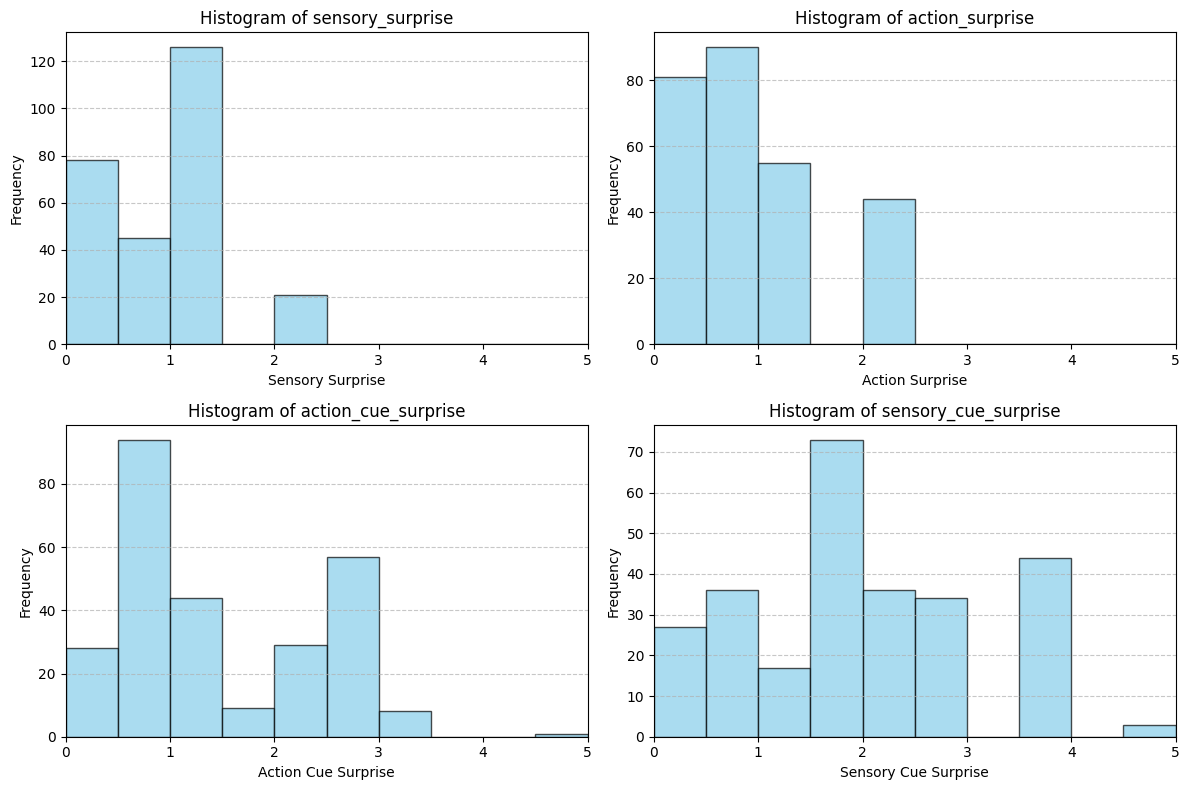

In [167]:
bin_num = 10

columns = ['sensory_surprise', 'action_surprise', 'action_cue_surprise', 'sensory_cue_surprise']
bins = np.linspace(0, 5, bin_num+1)  

plt.figure(figsize=(12, 8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Arrange in a 2x2 grid
    plt.hist(panos.log_data[col].dropna(), bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.xlim(0, 5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Characterize pupil size change

## find max

In [168]:
'''应该interpolate以后'''

'应该interpolate以后'

In [349]:
#whole_exp_trial = list(range(1, 271))
maxPupil_per_trial = []

for i in whole_exp_trial:
    maxPupil = panos.eye_data[(panos.eye_data['trial_index'] == i) & (panos.eye_data['Pupil'].notna())]['Pupil'].max()
    maxPupil_per_trial.append(maxPupil)



In [351]:
len(maxPupil_per_trial)

270

In [352]:
panos.log_data['maxPupil'] = maxPupil_per_trial

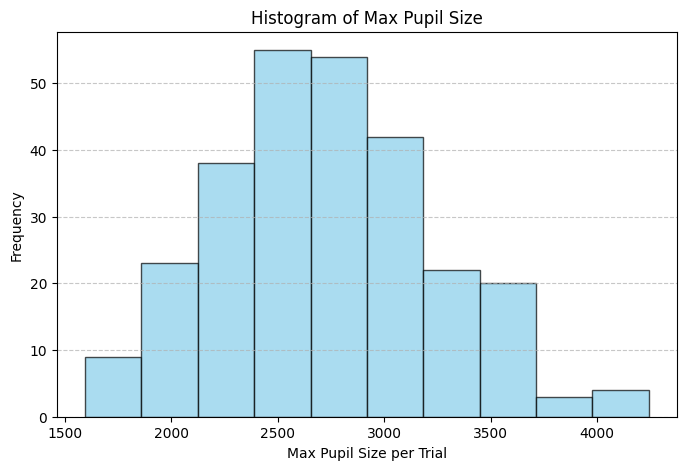

In [363]:

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(panos.log_data['maxPupil'].dropna(), color='skyblue', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('Max Pupil Size per Trial')
plt.ylabel('Frequency')
plt.title('Histogram of Max Pupil Size')

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


## scalar amplitude estimate by projecting on average pupil change (fmri?) 

* can use "By using a separate template per subject, it also accounts for the individual differences in the pupil impulse response function in a data-driven fashion"
* 0.5-2.0 since stimulus onset

In [210]:
trial_index = 1

In [211]:
sound_time = panos_eye[
    (panos_eye['event'].isin(['start decision window'])) & 
    (panos_eye['trial_index'] == trial_index)
]['TimeEvent'].iloc[0]

# Calculate the start and end bounds
start_bound = sound_time + 0.5
end_bound = sound_time + 2

# Display the calculated bounds
print(f"Start Bound: {start_bound}")
print(f"End Bound: {end_bound}")

test_data = panos.eye_data[
    (panos.eye_data['trial_index'] == trial_index) & 
    (panos.eye_data['Pupil'].notna()) & 
    (panos.eye_data['TimeEvent'] >= start_bound) & 
    (panos.eye_data['TimeEvent'] <= end_bound)
]

Start Bound: 68.76417419989593
End Bound: 70.26417419989593


before blink process: 1398
row numbers after blink process:  1398
row number after diff filtering:  1049
inner bound: 0.2 outer bound 0.22


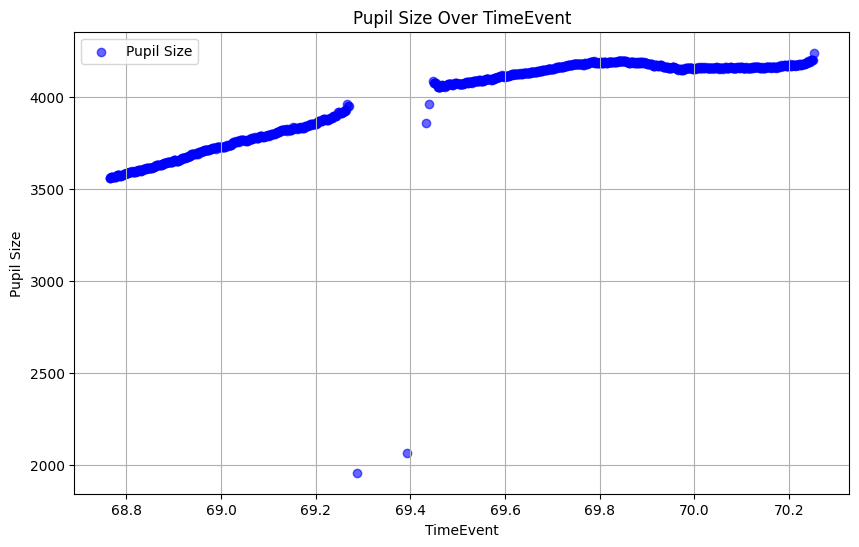

In [215]:
mydata = filter_eye_data_diff_blink(test_data,[trial_index],rep=1)

before blink process: 1398
row numbers after blink process:  1398
row number after diff filtering:  1049
inner bound: 0.2 outer bound 0.22
before blink process: 1049
row numbers after blink process:  1049
row number after diff filtering:  808
inner bound: 0.1 outer bound 0.11
before blink process: 808
row numbers after blink process:  808
row number after diff filtering:  673
inner bound: 0.1 outer bound 0.11


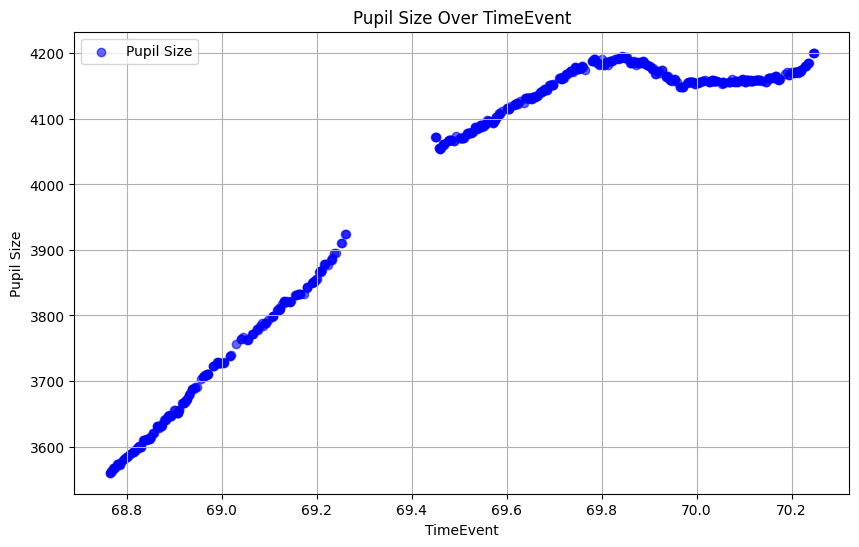

In [212]:
mydata = filter_eye_data_diff_blink(test_data,[trial_index],rep=3)

In [411]:

missing_count = 0
gaps = []

current_time = start_bound
# Iterate through index positions (excluding last index to avoid out-of-bounds error)
for i in range(len(mydata) - 1):  
    next_time = mydata.iloc[i]['TimeEvent']
    
    gap = next_time - current_time  # Ensure correct order
    gaps.append(gap)

    if gap > 0.001:
        add = math.floor(gap / 0.001) 
        missing_count += add
    
    current_time = next_time

gap = end_bound - current_time
gaps.append(gap)
if gap > 0.001:
        add = math.floor(gap / 0.001) 
        #missing_count += add

missing_count

687

In [414]:
gaps_series = pd.Series(gaps)  # Convert list to Pandas Series
print(gaps_series.describe())  # Now .describe() will work


count    840.000000
mean       0.001786
std        0.006977
min        0.000553
25%        0.001000
50%        0.001000
75%        0.001000
max        0.163000
dtype: float64


In [416]:
gaps

[0.07099999999991269,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0010000000002037268,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0010000000002037268,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0019999999999527063,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.00200000000018008,
 0.0019999999999527063,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.00200000000018008,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0009999999999763531,
 0.0019999999999527063,
 0.0010000000002037268,
 0.0009999999999763531

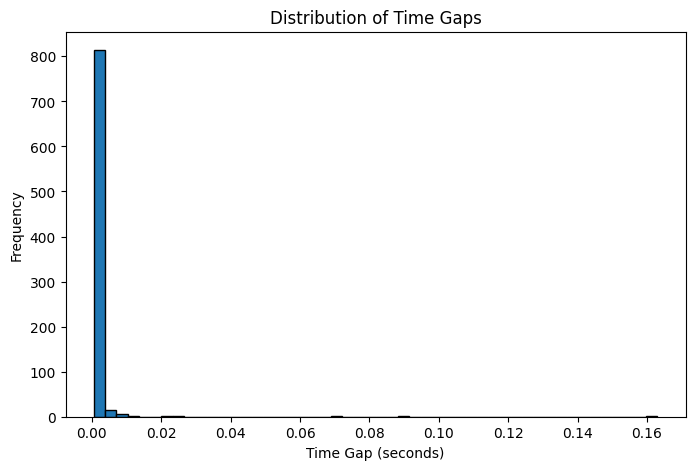

In [415]:


# Convert gaps list to Pandas Series
gaps_series = pd.Series(gaps)

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(gaps_series, bins=50, edgecolor='black')  # Adjust bins for better granularity

# Labels and title
plt.xlabel("Time Gap (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Time Gaps")

# Show the plot
plt.show()


In [404]:

expected_missing = 1500 - len(mydata)
print(f"Expected missing: {expected_missing}")


Expected missing: 660


In [400]:
panos.eye_data[panos.eye_data['Type'] == 'Blink']


,Type,Event,Time,TimeEvent,Offset,trial_index,X,Y,Pupil,event,...,Eye,Start_X,Start_Y,End_X,End_Y,Amplitude,Peak_Velocity,Pupil_diff,TimeEvent_diff,Pupil_derivative
385,Blink,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,show fixation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2438,Blink,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,show fixation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3730,Blink,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4613,Blink,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6750,Blink,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,show cue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368501,Blink,NaN,NaN,NaN,NaN,268,NaN,NaN,NaN,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370113,Blink,NaN,NaN,NaN,NaN,269,NaN,NaN,NaN,show fixation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373022,Blink,NaN,NaN,NaN,NaN,269,NaN,NaN,NaN,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375732,Blink,NaN,NaN,NaN,NaN,270,NaN,NaN,NaN,show cue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [402]:
panos.eye_data[panos.eye_data['Type'] == 'Blink'][['Start', 'End']]


,Start,End
385,65.777731,65.880731
2438,67.921844,68.002844
3730,69.289727,69.391727
4613,70.272727,70.356727
6750,72.501928,72.592928
...,...,...
1368501,1752.544653,1752.669653
1370113,1754.295070,1754.396070
1373022,1757.296578,1757.470578
1375732,1760.184469,1760.345469


In [419]:

missing_count = 0

 

# Iterate through the data to check missing timestamps
current_time = start_bound if mydata.empty else mydata.iloc[0]['TimeEvent']

for i in range(len(mydata) - 1):  
    next_time = mydata.iloc[i + 1]['TimeEvent']  # Compare with the next row
    gap = next_time - current_time  

    if gap > 0.001:  # If gap is larger than 1 ms
        missing_count += math.ceil(gap / 0.001) - 1  # Count missing points
    
    current_time = next_time  # Move to the next timestamp

# Check missing data after the last recorded TimeEvent
# if not mydata.empty:
#     last_time = mydata.iloc[-1]['TimeEvent']
#     if last_time < end_bound:
        #missing_count += math.ceil((end_bound - last_time) / 0.001)

missing_count


617

In [421]:
remain_missing = expected_missing - missing_count

if remain_missing > 0:
    # Calculate the gap before the first TimeEvent (before start_bound)
    first_gap = mydata.iloc[0]['TimeEvent'] - start_bound if not mydata.empty else 0
    
    # Calculate the gap after the last TimeEvent (after end_bound)
    last_gap = end_bound - mydata.iloc[-1]['TimeEvent'] if not mydata.empty else 0
    
    # Calculate the proportion of missing data to be assigned to the first and last gaps
    if first_gap + last_gap > 0:  # Ensure the sum of gaps is greater than 0
        first_missing = round(remain_missing * first_gap / (first_gap + last_gap))
        last_missing = remain_missing - first_missing
        
        print(f"First gap: {first_gap}, Last gap: {last_gap}")
        print(f"First missing: {first_missing}, Last missing: {last_missing}")
    else:
        print("No gaps to fill.")
else:
    print("No missing data to distribute.")




First gap: 0.07099999999991269, Last gap: 0.08744719987930694
First missing: 19, Last missing: 24


In [422]:
first_missing+last_missing+missing_count

660

In [439]:

trial_index = 1

''' Determine time bound '''
sound_time = panos_eye[
    (panos_eye['event'].isin(['start decision window'])) & 
    (panos_eye['trial_index'] == trial_index)
]['TimeEvent'].iloc[0]

start_bound = sound_time + 0.5
end_bound = sound_time + 2

''' Find dataset '''
selected_data = panos.eye_data[
    (panos.eye_data['trial_index'] == trial_index) & 
    (panos.eye_data['Pupil'].notna()) & 
    (panos.eye_data['TimeEvent'] >= start_bound) & 
    (panos.eye_data['TimeEvent'] <= end_bound)
]

processed_data = process_pupil_data(selected_data, [trial_index])

''' Determine how many missing for each gap '''
missing_count = []

# Check missing timestamps
if not processed_data.empty:
    current_time = processed_data.iloc[0]['TimeEvent']
    
    for i in range(len(processed_data) - 1):  
        next_time = processed_data.iloc[i + 1]['TimeEvent']
        gap = next_time - current_time  

        if gap > 0.001:  # If gap is larger than 1 ms
            missing_count.append(math.ceil(gap / 0.001) - 1)  # Count missing points
        else:
            missing_count.append(0)

        current_time = next_time  # Move to the next timestamp

# Sum of missing points
raw_total_missing = sum(missing_count)
print("Raw total missing count:", raw_total_missing)

''' Expected missing '''
expected_missing = 1500 - len(processed_data)
print(f"Expected missing: {expected_missing}")

''' Determine gaps at the beginning and the end '''
remain_missing = expected_missing - raw_total_missing

if remain_missing > 0:
    # Calculate the gap before the first TimeEvent (before start_bound)
    first_gap = processed_data.iloc[0]['TimeEvent'] - start_bound if not processed_data.empty else 0 
    # Calculate the gap after the last TimeEvent (after end_bound)
    last_gap = end_bound - processed_data.iloc[-1]['TimeEvent'] if not processed_data.empty else 0
    
    # Distribute remaining missing data proportionally
    if first_gap + last_gap > 0:  # Ensure total gap is > 0 to avoid division by zero
        first_missing = round(remain_missing * first_gap / (first_gap + last_gap))
        last_missing = remain_missing - first_missing
        
        print(f"First gap: {first_gap}, Last gap: {last_gap}")
        print(f"First missing: {first_missing}, Last missing: {last_missing}")
    else:
        first_missing = 0
        last_missing = 0
        print("No gaps to fill.")
else:
    first_missing = 0
    last_missing = 0
    print("No missing data to distribute.")

# Assign first_missing at the beginning and last_missing at the end
missing_count.insert(0, first_missing)  # Add to the beginning
missing_count.append(last_missing)  # Add to the end

print(f"Updated missing count list: {missing_count}")
print(f"Final total missing: {sum(missing_count)} (should match expected missing)")


Raw total missing count: 617
Expected missing: 660
First gap: 0.07099999999991269, Last gap: 0.08744719987930694
First missing: 19, Last missing: 24
Updated missing count list: [19, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [426]:
# create a numpy list of the pupil sizes given missing_count

processed_data

,Type,Event,Time,TimeEvent,Offset,trial_index,X,Y,Pupil,event,...,Eye,Start_X,Start_Y,End_X,End_Y,Amplitude,Peak_Velocity,Pupil_diff,TimeEvent_diff,Pupil_derivative
3273,Gaze,NaN,NaN,68.835174,NaN,1,628.6,474.3,3610.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
3274,Gaze,NaN,NaN,68.836174,NaN,1,628.5,474.3,3610.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
3275,Gaze,NaN,NaN,68.837174,NaN,1,628.4,474.1,3610.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
3276,Gaze,NaN,NaN,68.838174,NaN,1,628.5,474.2,3610.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
3277,Gaze,NaN,NaN,68.839174,NaN,1,628.5,474.3,3610.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,Gaze,NaN,NaN,70.172727,NaN,1,608.1,499.7,4160.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.001,1000.0
4513,Gaze,NaN,NaN,70.173727,NaN,1,608.2,499.8,4161.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
4514,Gaze,NaN,NaN,70.174727,NaN,1,608.3,499.8,4161.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.001,1000.0
4515,Gaze,NaN,NaN,70.175727,NaN,1,608.8,499.3,4162.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.001,1000.0


In [435]:

process_pupil_data(panos.eye_data,[1])

,Type,Event,Time,TimeEvent,Offset,trial_index,X,Y,Pupil,event,...,Eye,Start_X,Start_Y,End_X,End_Y,Amplitude,Peak_Velocity,Pupil_diff,TimeEvent_diff,Pupil_derivative
77,Gaze,NaN,NaN,65.475473,NaN,1,1010.7,1106.2,3128.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
78,Gaze,NaN,NaN,65.476473,NaN,1,1010.7,1106.2,3128.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.001,1000.0
79,Gaze,NaN,NaN,65.477473,NaN,1,1010.7,1106.2,3129.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
80,Gaze,NaN,NaN,65.478473,NaN,1,1010.8,1105.6,3129.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.001,-2000.0
81,Gaze,NaN,NaN,65.479473,NaN,1,1010.8,1105.6,3127.0,start recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.001,-1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,Gaze,NaN,NaN,70.674727,NaN,1,609.8,474.8,4074.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.001,-1000.0
4935,Gaze,NaN,NaN,70.675727,NaN,1,609.8,474.8,4073.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
4937,Gaze,NaN,NaN,70.677727,NaN,1,609.6,474.9,4081.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
4939,Gaze,NaN,NaN,70.679727,NaN,1,609.1,475.1,4078.0,response,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0


In [437]:
target_index = processed_data.index[0] if not processed_data.empty else None
first_time_event = processed_data['TimeEvent'].iloc[0] if not processed_data.empty else None
print("First TimeEvent:", first_time_event)
print("target index:", target_index)

First TimeEvent: 68.83517419989585
target index: 3273


In [451]:
# Process the pupil data
processed_complete_data = process_pupil_data(panos.eye_data, [1])

# Calculate the reference time
reference_time = first_time_event - first_gap

# Find the index of the reference row (the first row where TimeEvent >= reference_time)
reference_index = processed_complete_data[processed_complete_data['TimeEvent'] >= reference_time].index[0]
print(reference_index, reference_time)

selected_rows = processed_complete_data.loc[reference_index - 15 : reference_index - 7]
selected_rows


3202 68.76417419989593


,Type,Event,Time,TimeEvent,Offset,trial_index,X,Y,Pupil,event,...,Eye,Start_X,Start_Y,End_X,End_Y,Amplitude,Peak_Velocity,Pupil_diff,TimeEvent_diff,Pupil_derivative
3189,Gaze,NaN,NaN,68.751174,NaN,1,629.3,471.5,3556.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
3190,Gaze,NaN,NaN,68.752174,NaN,1,628.5,472.3,3556.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.001,-2000.0
3191,Gaze,NaN,NaN,68.753174,NaN,1,628.5,472.3,3554.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.001,-2000.0
3192,Gaze,NaN,NaN,68.754174,NaN,1,628.4,472.4,3552.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.001,1000.0
3193,Gaze,NaN,NaN,68.755174,NaN,1,628.4,472.1,3553.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0
3194,Gaze,NaN,NaN,68.756174,NaN,1,629.1,472.1,3553.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.001,1000.0
3195,Gaze,NaN,NaN,68.757174,NaN,1,629.1,472.3,3554.0,start decision window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001,0.0


In [456]:

# Assuming the first row of processed_data and average pupil size are already available
first_row = processed_data.iloc[0]  # Get the first row of processed_data
first_pupil_size = first_row['Pupil']  # Get the 'Pupil' value from the first row

# Create an array of evenly spaced values between the first pupil size and the average pupil size
# np.linspace generates num_missing_points points between first_pupil_size and average_pupil_size
interpolated_pupil_sizes = np.linspace(average_pupil_size, first_pupil_size, missing_count[0])

# Print or store the interpolated pupil sizes
print("Interpolated Pupil Sizes:", interpolated_pupil_sizes)



Interpolated Pupil Sizes: [3554.         3557.11111111 3560.22222222 3563.33333333 3566.44444444
 3569.55555556 3572.66666667 3575.77777778 3578.88888889 3582.
 3585.11111111 3588.22222222 3591.33333333 3594.44444444 3597.55555556
 3600.66666667 3603.77777778 3606.88888889 3610.        ]


In [459]:
# Get the last row of processed_data
last_row = processed_data.iloc[-1]  # Get the last row of processed_data
last_pupil_size = last_row['Pupil']  # Get the 'Pupil' value from the last row

# Get the last time event from the processed_data
last_time_event = processed_data['TimeEvent'].iloc[-1] if not processed_data.empty else None

# Calculate the reference time based on the last time event and last gap
reference_time_last = last_time_event - last_gap

# Find the index of the reference row where TimeEvent >= reference_time
reference_index_last = processed_data[processed_data['TimeEvent'] >= reference_time_last].index[0]
print(f"Reference index: {reference_index_last}, Reference time: {reference_time_last}")

# Select rows from reference_index + 7 to reference_index + 15 (total 9 rows)
# Ensure that the index does not go out of bounds
selected_rows_last = processed_data.loc[reference_index_last + 7 : reference_index_last + 15]

# In case there are fewer rows, adjust the selection
num_rows = len(selected_rows_last)
print(f"Selected rows: {num_rows}")

# If there are fewer than 9 rows, adjust to select as many as possible
if num_rows < 9:
    selected_rows_last = processed_data.loc[reference_index_last + 7 : reference_index_last + 7 + num_rows]

#print(f"Selected rows after adjustment:\n{selected_rows_last}")

# Calculate the average pupil size for the selected rows
average_pupil_size_last = selected_rows_last['Pupil'].mean()
print(f"Average pupil size for selected rows: {average_pupil_size_last}")

# Determine the number of data points to interpolate based on the last entry of missing_count
num_missing_points_last = missing_count[-1]  # The number of missing data points to generate for the last row

# Create an array of evenly spaced values between the last pupil size and the average pupil size
# np.linspace generates num_missing_points_last points between last_pupil_size and average_pupil_size
interpolated_pupil_sizes_last = np.linspace(last_pupil_size, average_pupil_size_last, num_missing_points_last)

# Print or store the interpolated pupil sizes
print("Interpolated Pupil Sizes (for last row):", interpolated_pupil_sizes_last)


Reference index: 4434, Reference time: 70.08927980013732
Selected rows: 6
Average pupil size for selected rows: 4159.0
Interpolated Pupil Sizes (for last row): [4163.         4162.82608696 4162.65217391 4162.47826087 4162.30434783
 4162.13043478 4161.95652174 4161.7826087  4161.60869565 4161.43478261
 4161.26086957 4161.08695652 4160.91304348 4160.73913043 4160.56521739
 4160.39130435 4160.2173913  4160.04347826 4159.86956522 4159.69565217
 4159.52173913 4159.34782609 4159.17391304 4159.        ]


In [511]:
# Initialize the list to hold the new Pupil values after processing
new_pupil_data = []
new_pupil_data.extend(interpolated_pupil_sizes)

# Loop over each index to check gaps
for i in range(len(missing_count[1:-1])):
    # Check if i is not the last index
    if i < len(missing_count) - 1:  # Ensure we don't exceed bounds
        # Check if there is no missing data in the next index
        
        if missing_count[i + 1] == 0:
            # If no missing data, simply take the pupil size from the current row
            current_pupil_value = processed_data.iloc[i]['Pupil']
            new_pupil_data.append(current_pupil_value)
        else:
            # If there is a gap, perform linear interpolation for the missing points
            # print(f"trying to interpolate {missing_count[i+1]}values")
            interpolated_values = np.linspace(
                processed_data.iloc[i]['Pupil'],
                processed_data.iloc[i + 1]['Pupil'],
                missing_count[i+1] + 2  # Including the two bounds (start and end)
            )[:-1]  # Skip the first and last values to avoid duplicating bounds
            #print(interpolated_values)
            new_pupil_data.extend(interpolated_values)
    else:
        # Handle the last index (if there's no next row to interpolate with)
        current_pupil_value = processed_data.iloc[i]['Pupil']
        new_pupil_data.append(current_pupil_value)
    #print(missing_count[i+1], len(new_pupil_data))

# Append the last Pupil value to new_pupil_data
new_pupil_data.append(processed_data.iloc[-1]['Pupil'])

new_pupil_data.extend(interpolated_pupil_sizes_last) 

In [512]:
len(new_pupil_data)

1500

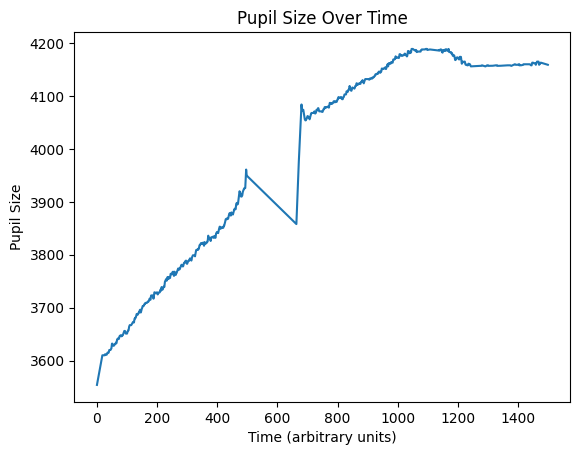

In [513]:
new_pupil_data = np.array(new_pupil_data)

# Plotting the new pupil data
plt.plot(new_pupil_data)
plt.title("Pupil Size Over Time")
plt.xlabel("Time (arbitrary units)")
plt.ylabel("Pupil Size")
plt.show()

# scratches


In [ ]:


def process_pupil_data(eye_data, trial_index_list, inner_bound=0.2, outer_bound=0.22, lower_bound=-2, upper_bound=2, window_size=120):
    # Step 1: Filter data by trial index
    eyedatacopy = eye_data[eye_data['trial_index'].isin(trial_index_list)].copy()

    # Step 2: Identify blinks and their timing
    blink_data = eyedatacopy[eyedatacopy['Type'] == 'Blink'][['Start', 'End']]

    before_pupil_sizes = []
    after_pupil_sizes = []

    # Step 3: Compute average pupil size before and after each blink
    for _, blink in blink_data.iterrows():
        start_time = blink['Start']
        end_time = blink['End']

        before_data = eyedatacopy[(eyedatacopy['TimeEvent'] >= start_time - outer_bound) &
                                  (eyedatacopy['TimeEvent'] < start_time - inner_bound)]
        avg_before = before_data['Pupil'].mean()

        after_data = eyedatacopy[(eyedatacopy['TimeEvent'] > end_time + inner_bound) &
                                 (eyedatacopy['TimeEvent'] <= end_time + outer_bound)]
        avg_after = after_data['Pupil'].mean()

        before_pupil_sizes.append(avg_before)
        after_pupil_sizes.append(avg_after)

    blink_data['Avg_Pupil_Before'] = before_pupil_sizes
    blink_data['Avg_Pupil_After'] = after_pupil_sizes

    # Step 4: Remove invalid pupil size values during blinks
    filtered_data = []

    for _, row in eyedatacopy.iterrows():
        valid = True
        for _, blink in blink_data.iterrows():
            if blink['Start'] - 0.05 <= row['TimeEvent'] <= blink['End'] + 0.05:
                avg_before = blink['Avg_Pupil_Before']
                avg_after = blink['Avg_Pupil_After']
                if not (avg_before <= row['Pupil'] <= avg_after):
                    valid = False
                    break
        if valid:
            filtered_data.append(row)

    filtered_df = pd.DataFrame(filtered_data)

    # Step 5: Compute pupil size difference and filter data based on change range
    filtered_df['Pupil_diff'] = filtered_df['Pupil'].shift(-1) - filtered_df['Pupil']
    filtered_df = filtered_df[(filtered_df['Pupil_diff'] >= lower_bound) & 
                              (filtered_df['Pupil_diff'] <= upper_bound)]

    # Step 6: Compute rolling median and IQR to detect and remove outliers
    rolling_median = filtered_df['Pupil'].rolling(window=window_size, center=True).median()
    rolling_iqr = filtered_df['Pupil'].rolling(window=window_size, center=True).quantile(0.55) - \
                  filtered_df['Pupil'].rolling(window=window_size, center=True).quantile(0.40)

    lower_outlier_bound = rolling_median - 1.5 * rolling_iqr
    upper_outlier_bound = rolling_median + 1.5 * rolling_iqr

    filtered_df = filtered_df[
        (filtered_df['Pupil'] >= lower_outlier_bound) & 
        (filtered_df['Pupil'] <= upper_outlier_bound)
    ]

    # # Step 7: Plot the cleaned pupil data over time
    # if 'TimeEvent' in filtered_df.columns and 'Pupil' in filtered_df.columns:
    #     plt.figure(figsize=(10, 6))
    #     plt.scatter(filtered_df['TimeEvent'], filtered_df['Pupil'], color='blue', alpha=0.6, label='Pupil Size')
    #     plt.title('Pupil Size Over TimeEvent')
    #     plt.xlabel('TimeEvent')
    #     plt.ylabel('Pupil Size')
    #     plt.legend()
    #     plt.grid(True)
    #     plt.show()
    # else:
    #     print("Error: filtered_df does not contain 'TimeEvent' or 'Pupil' columns.")

    return filtered_df
